# Aufgabe 1
Please start off with GPT2 and see if you can create a rectangular image
of the GPT2 weights (in Python). Use red color for negative weights and green color
for positive weights. Everything should be scaled by the maximum weight
in the network. It would probably be a good idea to use a sampling percentage
so that the resulting image will not become too big. But starting off you can just
create one huge image or matrix. The corresponding colors should be arranged in
such a way that the weights close to the input layer are at the bottom and
weights close to the output layer are at the top of the image.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Flat weights - max: 2.7956299781799316, min: -2.8436343669891357, mean: 5.337546099326573e-05, std: 0.1996195763349533
Weights before normalization: [-0.4738484  -0.26136586 -0.09780374 -0.34988934  0.22432406 -0.04292056
  0.41869533  0.17441125 -0.18825532  0.18357256]
Weights after normalization: [-0.16663478 -0.09191261 -0.03439392 -0.12304302  0.0788864  -0.01509356
  0.1472395   0.06133392 -0.06620236  0.06455562]


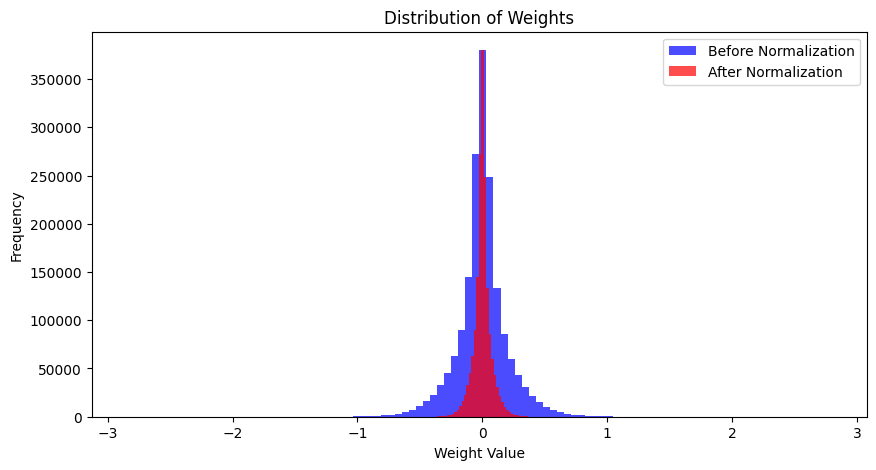

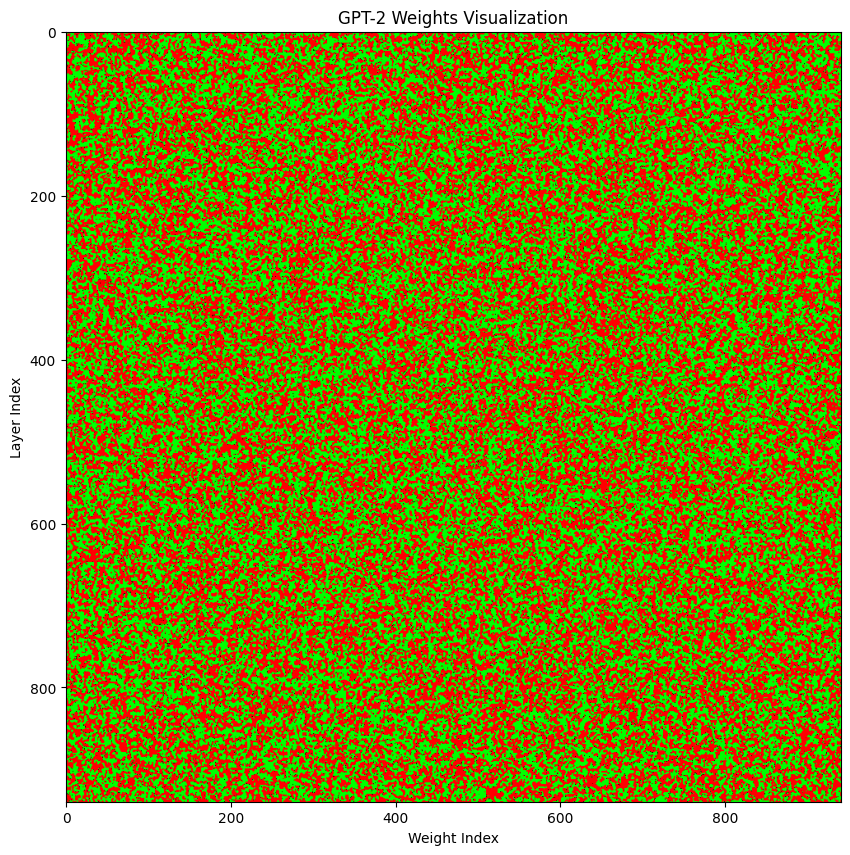

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import GPT2LMHeadModel
from scipy.ndimage import gaussian_filter    #for smoothing out Noise and make the weights more apparent

# Load the GPT-2 model
model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)

# Choose a specific layer to visualize, for example, the first attention layer weights
layer_name = 'transformer.h.0.attn.c_attn.weight'
layer_weights = None

# Extract the weights of the chosen layer
for name, param in model.named_parameters():
    if name == layer_name:
        layer_weights = param.data.cpu().numpy()
        break

if layer_weights is None:
    raise ValueError(f"Layer {layer_name} not found in the model.")

# Flatten the weights and concatenate them into a single array
flat_weights = layer_weights.flatten()

# Print the statistics of the flat weights
print(f"Flat weights - max: {np.max(flat_weights)}, min: {np.min(flat_weights)}, mean: {np.mean(flat_weights)}, std: {np.std(flat_weights)}")

# Normalize the weights by the maximum absolute weight
max_abs_weight = np.max(np.abs(flat_weights))
normalized_weights = flat_weights / max_abs_weight

# Print some of the weights before and after normalization
print("Weights before normalization:", flat_weights[:10])
print("Weights after normalization:", normalized_weights[:10])

# Verify the distribution of weights before and after normalization
plt.figure(figsize=(10, 5))
plt.hist(flat_weights, bins=100, color='blue', alpha=0.7, label='Before Normalization')
plt.hist(normalized_weights, bins=100, color='red', alpha=0.7, label='After Normalization')
plt.title('Distribution of Weights')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Increase the sampling percentage
sampling_percentage = 0.5  # Increase this value to sample more weights

# Determine the size of the image
total_weights = len(normalized_weights)
sampled_weights = int(total_weights * sampling_percentage)
height = int(np.sqrt(sampled_weights))  # Height for a roughly square image
width = sampled_weights // height  # Width based on the total number of samples
sampled_matrix = normalized_weights[:height * width].reshape((height, width))

# Apply a Gaussian filter to smooth the image and reduce noise
sampled_matrix = gaussian_filter(sampled_matrix, sigma=1)

# Enhance visibility by scaling the weights for better color distinction
scale_factor = 1000  # Further increase the scale for better visibility
sampled_matrix *= scale_factor

# Create the image with red for negative weights and green for positive weights
image = np.zeros((height, width, 3))
image[:, :, 0] = np.where(sampled_matrix < 0, -sampled_matrix, 0)  # Red channel for negative weights
image[:, :, 1] = np.where(sampled_matrix > 0, sampled_matrix, 0)   # Green channel for positive weights

# Clip values to be within the range [0, 1]
#image = np.clip(image, 0, 1)

# Display the image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image[::-1], aspect='auto')  # Reverse the image vertically
plt.title('GPT-2 Weights Visualization')
plt.xlabel('Weight Index')
plt.ylabel('Layer Index')
plt.show()


#Aufgabe 2

Create a function that takes and a matrix and visulaize it into an RGB image ,make it scaled.


[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.

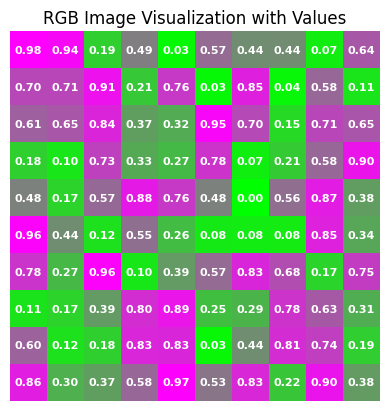

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_matrix_as_rgb(matrix):

    # Ensure the input is a NumPy array
    matrix = np.array(matrix)

    # Normalize the matrix values to the range [0, 1]
    norm_matrix = (matrix - matrix.min()) / (matrix.max() - matrix.min())

    # Create an RGB image
    height, width = norm_matrix.shape
    rgb_image = np.zeros((height, width, 3))

    print(rgb_image)

    # Assign the normalized values to different channels
    rgb_image[:, :, 0] = norm_matrix  # Red channel
    rgb_image[:, :, 1] = 1 - norm_matrix  # Green channel (inverted values for contrast)
    rgb_image[:, :, 2] = norm_matrix  # Blue channel

    # Display the image
    plt.imshow(rgb_image)
    plt.title('RGB Image Visualization with Values')
    plt.axis('off')  # Hide the axis

    # Overlay numerical values
    for i in range(height):
        for j in range(width):
            plt.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', color='white', fontsize=8, weight='bold')

    plt.show()

# Example usage
matrix = np.random.rand(10, 10)  # Example 10x10 matrix
visualize_matrix_as_rgb(matrix)


# Aufgabe 3

Please do the following. For any given network
you place a color dot in a 2D matrix according to the layout
as explained in the attached PDF. Each layer should have its own color.
Pick the color from this list: red, green, blue, cyan, yellow, magenta, then start over.
If a weight is not there, then there is no dot.



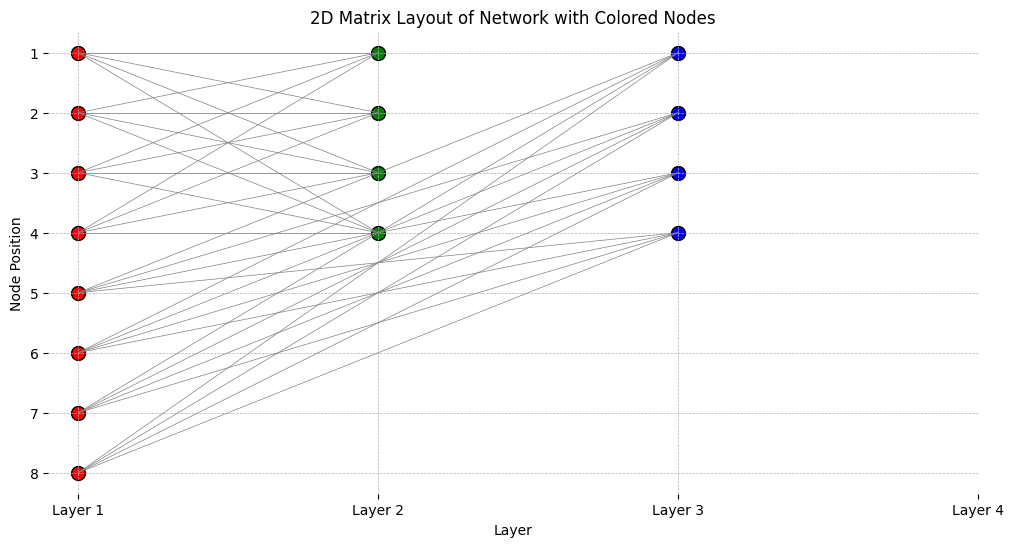

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def create_color_map(num_layers):
    colors = ['red', 'green', 'blue', 'cyan', 'yellow', 'magenta']
    color_map = {}
    for i in range(num_layers):
        color_map[i + 1] = colors[i % len(colors)]
    return color_map

def get_dot_color(layer_num, color_map):
    return color_map.get(layer_num)

# Define the connections
connections = [
    (1, 9), (1, 10), (1, 11), (1, 12),
    (2, 9), (2, 10), (2, 11), (2, 12),
    (3, 9), (3, 10), (3, 11), (3, 12),
    (4, 9), (4, 10), (4, 11), (4, 12),
    (5, 13), (5, 14), (5, 15), (5, 16),
    (6, 13), (6, 14), (6, 15), (6, 16),
    (7, 13), (7, 14), (7, 15), (7, 16),
    (8, 13), (8, 14), (8, 15), (8, 16)
]

# Define the layer sizes
layer_sizes = [8, 4, 4, 4]

# Setup the visualization
fig, ax = plt.subplots(figsize=(12, 6))
current_node = 1
positions = {}

# Create color map for layers
color_map = create_color_map(len(layer_sizes))

# Plot nodes with colors based on layers
for i, size in enumerate(layer_sizes):
    layer_color = get_dot_color(i + 1, color_map)
    for j in range(size):
        # Only plot nodes that have connections
        if any((current_node, node) in connections or (node, current_node) in connections for node in range(1, 17)):
            ax.scatter(i, j, color=layer_color, s=100, edgecolors='black')
            positions[current_node] = (i, j)
        current_node += 1

# Plot the connections
for node_a, node_b in connections:
    if node_a in positions and node_b in positions:
        pos_a, pos_b = positions[node_a], positions[node_b]
        ax.plot([pos_a[0], pos_b[0]], [pos_a[1], pos_b[1]], color='gray', linestyle='-', linewidth=0.5)

# Set up the plot aesthetics
plt.xticks(range(len(layer_sizes)), ['Layer {}'.format(i + 1) for i in range(len(layer_sizes))])
plt.yticks(range(max(layer_sizes)), range(1, max(layer_sizes) + 1))
plt.gca().invert_yaxis()
ax.set_frame_on(False)
plt.xlabel("Layer")
plt.ylabel("Node Position")
plt.title("2D Matrix Layout of Network with Colored Nodes")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


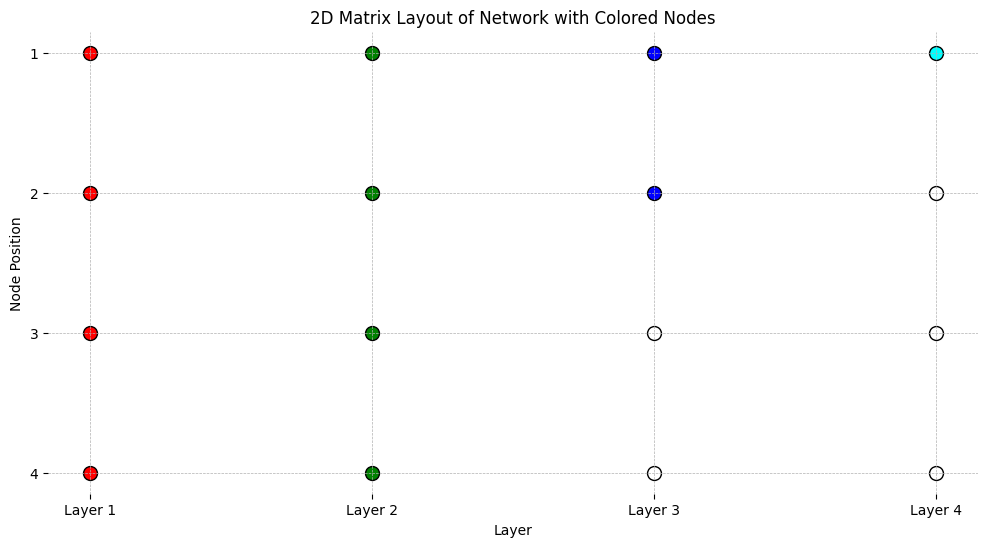

In [ ]:
import matplotlib.pyplot as plt

def create_color_map(num_layers):
    colors = ['red', 'green', 'blue', 'cyan', 'yellow', 'magenta']
    color_map = {}
    for i in range(num_layers):
        color_map[i + 1] = colors[i % len(colors)]  # Cycle through colors
    return color_map

def get_dot_color(layer_num, color_map):
    return color_map.get(layer_num)  # Use get to handle potential missing layers

connections = [ # Replace with your actual connections data
     (1, 5), (2, 6), (3, 7), (4, 8),  # Connections from Layer 1 to Layer 2
    (5, 9), (6, 10),  # Some connections from Layer 2 to Layer 3
    (9, 13)
]

layer_sizes = [4, 4, 4, 4] # Specify the number of nodes in each layer

# Setup the visualization
fig, ax = plt.subplots(figsize=(12, 6))
current_node = 1
positions = {} # To hold the positions of nodes for plotting

# Determine node positions and plot them with colors based on layers
color_map = create_color_map(len(layer_sizes)) # Create color map
for i, size in enumerate(layer_sizes):
    layer_color = get_dot_color(i + 1, color_map) # Get color for this layer
    for j in range(size):
        if any(conn[0] == current_node or conn[1] == current_node for conn in connections):
            color = layer_color
        else:
            color = 'white'  # Set color to white for nodes without connections
        ax.scatter(i, j, color=color, s=100, edgecolors='black')
        positions[current_node] = (i, j) # Store position
        current_node += 1

# Set up the plot aesthetics
plt.xticks(range(len(layer_sizes)), ['Layer {}'.format(i + 1) for i in range(len(layer_sizes))])
plt.yticks(range(max(layer_sizes)), range(1, max(layer_sizes) + 1))
plt.gca().invert_yaxis() # Invert y-axis
ax.set_frame_on(False) # Turn off the frame
plt.xlabel("Layer")
plt.ylabel("Node Position")
plt.title("2D Matrix Layout of Network with Colored Nodes")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# Aufgabe 4
you should process data from a PyTorch or tensorflow
network. See the minGPT example.
Output should be a RGB-matrix that you can save as an image file.

In [ ]:
pip install torch


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
!git clone https://github.com/karpathy/minGPT.git
%cd minGPT
!pip install -e .


Cloning into 'minGPT'...
remote: Enumerating objects: 489, done.
remote: Total 489 (delta 0), reused 0 (delta 0), pack-reused 489
Receiving objects: 100% (489/489), 1.44 MiB | 8.57 MiB/s, done.
Resolving deltas: 100% (261/261), done.
/content/minGPT
Obtaining file:///content/minGPT
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_

number of parameters: 124.44M


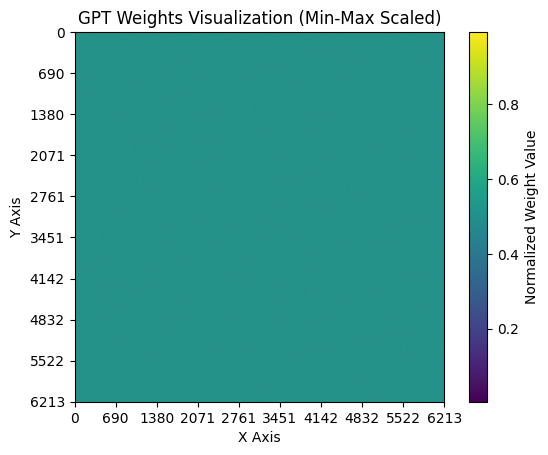

('/mnt/data/gpt_weights_rgb_matrix.npy',
 '/mnt/data/gpt_weights_visualization.png')

In [ ]:
import torch
from mingpt.model import GPT
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
import os

# Ensure the directory exists
output_dir = '/mnt/data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load GPT-2 model configuration
model_config = GPT.get_default_config()
model_config.model_type = 'gpt2'
model_config.vocab_size = 50257
model_config.block_size = 1024
model = GPT(model_config)

# Function to create an RGB matrix from weights with min-max scaling
def weights_to_rgb(weights):
    # Apply min-max normalization
    norm = Normalize(vmin=np.min(weights), vmax=np.max(weights))

    # Create an RGB matrix using a colormap
    cmap = plt.get_cmap('viridis')
    rgb_weights = cmap(norm(weights))

    # Remove the alpha channel (keep only RGB)
    rgb_weights = rgb_weights[:, :, :3]

    return rgb_weights

# Extract weights from the first layer
weights = model.transformer.wte.weight.data.numpy()

# Determine the shape for better visualization
vocab_size, embedding_dim = weights.shape
total_elements = vocab_size * embedding_dim
side_length = int(np.ceil(np.sqrt(total_elements)))

# Create a padded weights array
padded_weights = np.zeros((side_length * side_length))

# Flatten the weights and pad them to fit into the square shape
flat_weights = weights.flatten()
padded_weights[:flat_weights.size] = flat_weights

# Reshape the padded weights to a 2D array for visualization
reshaped_weights = padded_weights.reshape((side_length, side_length))

# Convert weights to an RGB matrix
rgb_weights = weights_to_rgb(reshaped_weights)

# Save the RGB matrix as a NumPy file
rgb_matrix_path = os.path.join(output_dir, 'gpt_weights_rgb_matrix.npy')
np.save(rgb_matrix_path, rgb_weights)

# Save the RGB matrix as an image file
image_path = os.path.join(output_dir, 'gpt_weights_visualization.png')
plt.imsave(image_path, rgb_weights)

# Display the image with axes
plt.imshow(rgb_weights)
plt.title('GPT Weights Visualization (Min-Max Scaled)')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.xticks(np.linspace(0, side_length, num=10, dtype=int))  # Adjust number of ticks as needed
plt.yticks(np.linspace(0, side_length, num=10, dtype=int))  # Adjust number of ticks as needed
plt.colorbar(label='Normalized Weight Value')
plt.show()

# Output paths for reference
rgb_matrix_path, image_path


number of parameters: 124.44M
Visualizing 2304 nodes from layer 2


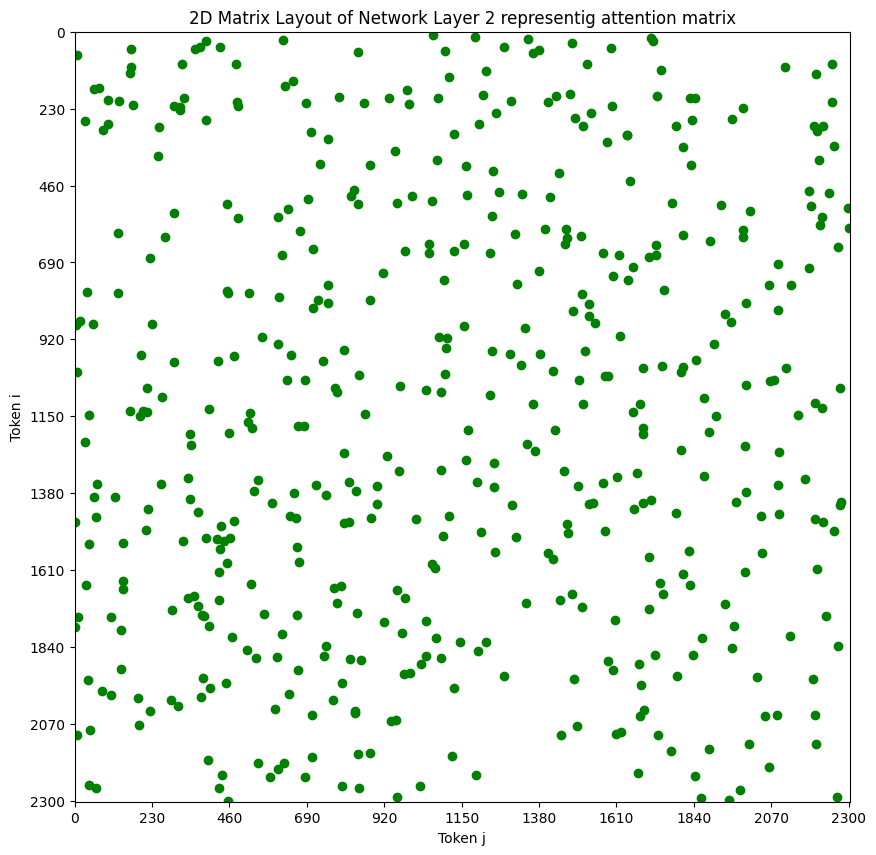

Visualization saved to /mnt/data/network_layer_2_visualization.png


In [ ]:
import torch
from mingpt.model import GPT
import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure the directory exists
output_dir = '/mnt/data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load GPT-2 model configuration
model_config = GPT.get_default_config()
model_config.model_type = 'gpt2'
model_config.vocab_size = 50257
model_config.block_size = 1024
model = GPT(model_config)

# Define colors for layers
colors = ['red', 'green', 'blue', 'cyan', 'yellow', 'magenta']

# Function to visualize a given layer with 2D matrix layout
def visualize_layer(layer_number, sample_size=500):
    # Check the number of layers
    num_layers = len(model.transformer.h)
    if layer_number >= num_layers:
        print(f"Layer number {layer_number} is out of range. Model has {num_layers} layers.")
        return

    # Extract weights from the specified layer
    layer = model.transformer.h[layer_number]
    weights = layer.attn.c_attn.weight.data.numpy()

    # Define positions for nodes
    num_nodes = weights.shape[0]
    print(f"Visualizing {num_nodes} nodes from layer {layer_number + 1}")

    # Sample points to plot if the number of nodes is too large
    indices = np.random.choice(num_nodes * num_nodes, sample_size, replace=False)
    sampled_positions = [(idx // num_nodes, idx % num_nodes) for idx in indices]

    # Create a figure
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_title(f'2D Matrix Layout of Network Layer {layer_number + 1} representig attention matrix')
    ax.set_xlabel('Token j')
    ax.set_ylabel('Token i')

    # Plot the sampled nodes with the specified color
    for pos in sampled_positions:
        ax.plot(pos[0], pos[1], 'o', color=colors[layer_number % len(colors)])

    # Set axis limits and ticks
    ax.set_xlim(0, num_nodes - 1)
    ax.set_ylim(0, num_nodes - 1)
    ax.set_xticks(np.arange(0, num_nodes, step=num_nodes // 10))
    ax.set_yticks(np.arange(0, num_nodes, step=num_nodes // 10))
    ax.invert_yaxis()  # Optional: to have the origin at the top left like a matrix

    # Save the plot
    image_path = os.path.join(output_dir, f'network_layer_{layer_number + 1}_visualization.png')
    plt.savefig(image_path)
    plt.show()

    return image_path

# Example usage
layer_number = 1  # Change this to visualize a different layer
image_path = visualize_layer(layer_number)
if image_path:
    print(f'Visualization saved to {image_path}')


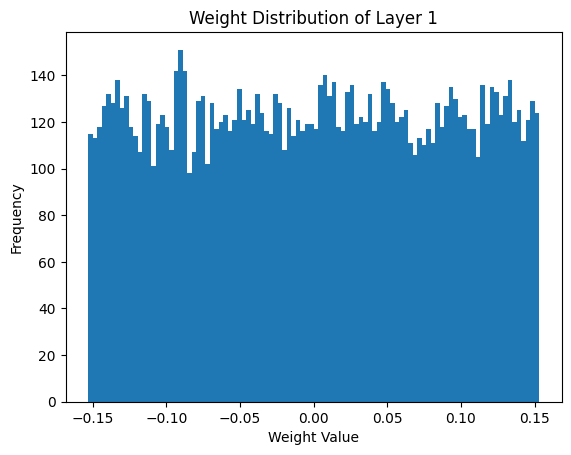

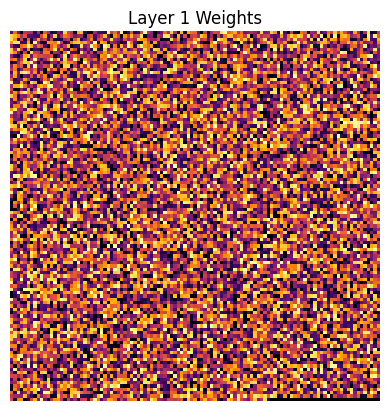

Visualization saved to /mnt/data/network_layer_1_weights.png


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os

# Define a small GPT-like model
class SmallGPT(nn.Module):
    def __init__(self, vocab_size, block_size, n_embd, n_layer, n_head):
        super(SmallGPT, self).__init__()
        self.vocab_size = vocab_size
        self.block_size = block_size
        self.n_embd = n_embd
        self.n_layer = n_layer
        self.n_head = n_head
        self.embedding = nn.Embedding(vocab_size, n_embd)
        self.layers = nn.ModuleList([nn.TransformerEncoderLayer(n_embd, n_head) for _ in range(n_layer)])
        self.fc = nn.Linear(n_embd, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        for layer in self.layers:
            x = layer(x)
        logits = self.fc(x)
        return logits

# Ensure the directory exists
output_dir = '/mnt/data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a small GPT-like model
vocab_size = 1000
block_size = 32
n_embd = 64
n_layer = 2
n_head = 2
model = SmallGPT(vocab_size, block_size, n_embd, n_layer, n_head)

# Function to visualize a given layer with 2D matrix layout
def visualize_layer_as_image(layer_number):
    # Check the number of layers
    num_layers = len(model.layers)
    if layer_number >= num_layers:
        print(f"Layer number {layer_number} is out of range. Model has {num_layers} layers.")
        return

    # Extract weights from the specified layer
    layer = model.layers[layer_number].self_attn.in_proj_weight.data.numpy()

    # Check the distribution of the weights
    plt.hist(layer.flatten(), bins=100)
    plt.title(f'Weight Distribution of Layer {layer_number + 1}')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.show()

    # Normalize weights using a different technique for better visualization
    min_weight = np.min(layer)
    max_weight = np.max(layer)
    if max_weight - min_weight > 0:
        normalized_weights = (layer - min_weight) / (max_weight - min_weight)
    else:
        normalized_weights = np.zeros_like(layer)

    # Reshape weights to a 2D grid for visualization
    num_elements = normalized_weights.size
    side_length = int(np.ceil(np.sqrt(num_elements)))
    padded_weights = np.zeros((side_length * side_length))
    padded_weights[:num_elements] = normalized_weights.flatten()
    reshaped_weights = padded_weights.reshape((side_length, side_length))

    # Create an RGB image using a colormap
    cmap = plt.get_cmap('inferno')
    rgb_image = cmap(reshaped_weights)

    # Remove the alpha channel (keep only RGB)
    rgb_image = rgb_image[:, :, :3]

    # Save the image
    image_path = os.path.join(output_dir, f'network_layer_{layer_number + 1}_weights.png')
    plt.imsave(image_path, rgb_image)

    # Display the image
    plt.imshow(rgb_image)
    plt.title(f'Layer {layer_number + 1} Weights')
    plt.axis('off')
    plt.show()

    return image_path

# Example usage
layer_number = 0  # Change this to visualize a different layer
image_path = visualize_layer_as_image(layer_number)
if image_path:
    print(f'Visualization saved to {image_path}')


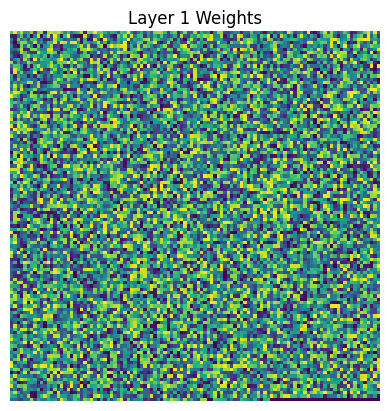

Visualization saved to /mnt/data/network_layer_1_weights.png


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import os

# Define a small GPT-like model
class SmallGPT(nn.Module):
    def __init__(self, vocab_size, block_size, n_embd, n_layer, n_head):
        super(SmallGPT, self).__init__()
        self.vocab_size = vocab_size
        self.block_size = block_size
        self.n_embd = n_embd
        self.n_layer = n_layer
        self.n_head = n_head
        self.embedding = nn.Embedding(vocab_size, n_embd)
        self.layers = nn.ModuleList([nn.TransformerEncoderLayer(n_embd, n_head) for _ in range(n_layer)])
        self.fc = nn.Linear(n_embd, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        for layer in self.layers:
            x = layer(x)
        logits = self.fc(x)
        return logits

# Ensure the directory exists
output_dir = '/mnt/data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a small GPT-like model
vocab_size = 1000
block_size = 32
n_embd = 64
n_layer = 2
n_head = 2
model = SmallGPT(vocab_size, block_size, n_embd, n_layer, n_head)

# Function to visualize a given layer with 2D matrix layout
def visualize_layer_as_image(layer_number):
    # Check the number of layers
    num_layers = len(model.layers)
    if layer_number >= num_layers:
        print(f"Layer number {layer_number} is out of range. Model has {num_layers} layers.")
        return

    # Extract weights from the specified layer
    layer = model.layers[layer_number].self_attn.in_proj_weight.data.numpy()

    # Normalize weights to [0, 1] for visualization
    min_weight = np.min(layer)
    max_weight = np.max(layer)
    normalized_weights = (layer - min_weight) / (max_weight - min_weight)

    # Reshape weights to a 2D grid for visualization
    num_elements = normalized_weights.size
    side_length = int(np.ceil(np.sqrt(num_elements)))
    padded_weights = np.zeros((side_length * side_length))
    padded_weights[:num_elements] = normalized_weights.flatten()
    reshaped_weights = padded_weights.reshape((side_length, side_length))

    # Create an RGB image using a colormap
    cmap = plt.get_cmap('viridis')
    rgb_image = cmap(reshaped_weights)

    # Remove the alpha channel (keep only RGB)
    rgb_image = rgb_image[:, :, :3]

    # Save the image
    image_path = os.path.join(output_dir, f'network_layer_{layer_number + 1}_weights.png')
    plt.imsave(image_path, rgb_image)

    # Display the image
    plt.imshow(rgb_image)
    plt.title(f'Layer {layer_number + 1} Weights')
    plt.axis('off')
    plt.show()

    return image_path

# Example usage
layer_number = 0  # Change this to visualize a different layer
image_path = visualize_layer_as_image(layer_number)
if image_path:
    print(f'Visualization saved to {image_path}')


# Aufgabe 6
set up a tiny network to debug your code.
You need to make sure that everything works as intended.
All weights of the network should be put inside the same image.
Each layer should have its own color.
Pick the color from this list: red, green, blue, cyan, yellow, magenta, then start over.
You need to access all weights individually.
You need to know how to access the weights.

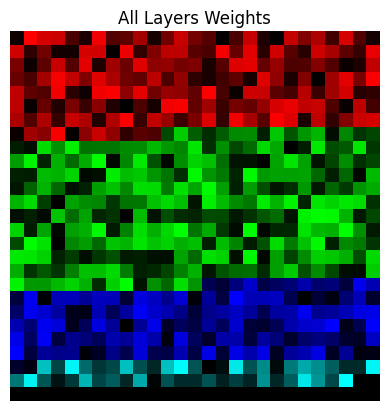

Visualization saved to /mnt/data/network_all_layers_weights.png


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os

# Define a tiny network
class TinyNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(TinyNetwork, self).__init__()
        self.layers = nn.ModuleList()
        in_size = input_size
        for h_size in hidden_sizes:
            self.layers.append(nn.Linear(in_size, h_size))
            in_size = h_size
        self.layers.append(nn.Linear(in_size, output_size))

    def forward(self, x):
        for layer in self.layers:
            x = torch.relu(layer(x))
        return x

# Ensure the directory exists
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Create a tiny network
input_size = 10
hidden_sizes = [20, 15, 10]
output_size = 5
model = TinyNetwork(input_size, hidden_sizes, output_size)

# Define RGB values for colors
colors = {
    'red': [1, 0, 0],
    'green': [0, 1, 0],
    'blue': [0, 0, 1],
    'cyan': [0, 1, 1],
    'yellow': [1, 1, 0],
    'magenta': [1, 0, 1]
}
color_list = list(colors.values())

# Function to visualize all layers' weights in a single image
def visualize_all_layers_as_image(model):
    all_weights = [layer.weight.data.numpy().flatten() for layer in model.layers]

    normalized_weights = []
    for weights in all_weights:
        min_w, max_w = weights.min(), weights.max()
        norm_weights = (weights - min_w) / (max_w - min_w) if max_w > min_w else np.zeros_like(weights)
        normalized_weights.append(norm_weights)

    concatenated_weights = np.concatenate(normalized_weights)
    num_elements = concatenated_weights.size
    side_length = int(np.ceil(np.sqrt(num_elements)))
    padded_weights = np.zeros((side_length, side_length))
    padded_weights.flat[:num_elements] = concatenated_weights

    rgb_image = np.zeros((side_length, side_length, 3))
    start_idx = 0

    for i, norm_weights in enumerate(normalized_weights):
        layer_size = norm_weights.size
        end_idx = start_idx + layer_size
        layer_color = np.array(color_list[i % len(color_list)])

        for idx in range(layer_size):
            pos = divmod(start_idx + idx, side_length)
            rgb_image[pos[0], pos[1]] = norm_weights[idx] * layer_color

        start_idx = end_idx

    image_path = os.path.join(output_dir, 'network_all_layers_weights.png')
    plt.imsave(image_path, rgb_image)
    plt.imshow(rgb_image)
    plt.title('All Layers Weights')
    plt.axis('off')
    plt.show()

    return image_path

# Example usage
image_path = visualize_all_layers_as_image(model)
if image_path:
    print(f'Visualization saved to {image_path}')


# Aufgabe 7
set up a very small network. Then set the weights manually.
Then visualise the weights. Then see if the results are plausible.
Are you able to (very very roughly) specify the weights given
the visualization?

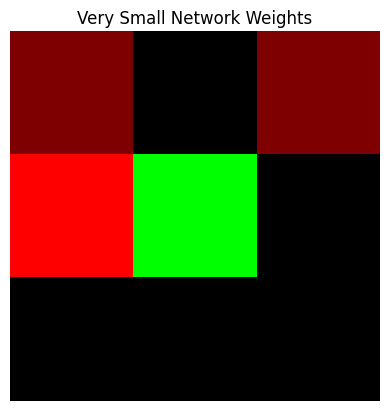

Visualization saved to /mnt/data/very_small_network_weights.png


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os

# Define a very small network
class VerySmallNetwork(nn.Module):
    def __init__(self):
        super(VerySmallNetwork, self).__init__()
        self.fc1 = nn.Linear(4, 4)  # 2 input neurons, 2 output neurons
        self.fc2 = nn.Linear(4, 4)  # 2 input neurons, 1 output neuron

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Ensure the directory exists
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Create a very small network
model = VerySmallNetwork()

# Manually set weights
with torch.no_grad():
    model.fc1.weight = nn.Parameter(torch.tensor([[0.3, 0.2], [0.3, 0.4]]))
    model.fc1.bias = nn.Parameter(torch.tensor([0.1, -0.1]))
    model.fc2.weight = nn.Parameter(torch.tensor([[0.5, -0.5]]))
    model.fc2.bias = nn.Parameter(torch.tensor([0.2]))

# Define RGB values for colors
colors = {
    'red': [1, 0, 0],
    'green': [0, 1, 0],
    'blue': [0, 0, 1]
}
color_list = list(colors.values())

# Function to visualize all layers' weights in a single image
def visualize_all_layers_as_image(model):
    all_weights = [layer.weight.data.numpy().flatten() for layer in model.children() if isinstance(layer, nn.Linear)]

    normalized_weights = []
    for weights in all_weights:
        min_w, max_w = weights.min(), weights.max()
        norm_weights = (weights - min_w) / (max_w - min_w) if max_w > min_w else np.zeros_like(weights)
        normalized_weights.append(norm_weights)

    concatenated_weights = np.concatenate(normalized_weights)
    num_elements = concatenated_weights.size
    side_length = int(np.ceil(np.sqrt(num_elements)))
    padded_weights = np.zeros((side_length, side_length))
    padded_weights.flat[:num_elements] = concatenated_weights

    rgb_image = np.zeros((side_length, side_length, 3))
    start_idx = 0

    for i, norm_weights in enumerate(normalized_weights):
        layer_size = norm_weights.size
        end_idx = start_idx + layer_size
        layer_color = np.array(color_list[i % len(color_list)])

        for idx in range(layer_size):
            pos = divmod(start_idx + idx, side_length)
            rgb_image[pos[0], pos[1]] = norm_weights[idx] * layer_color

        start_idx = end_idx

    image_path = os.path.join(output_dir, 'very_small_network_weights.png')
    plt.imsave(image_path, rgb_image)
    plt.imshow(rgb_image)
    plt.title('Very Small Network Weights')
    plt.axis('off')
    plt.show()

    return image_path

# Example usage
image_path = visualize_all_layers_as_image(model)
if image_path:
    print(f'Visualization saved to {image_path}')


# Aufgabe 8
please stick to the layout of the PDF that I sent you.
At the bottom you have the input layer, the output layer
is on top and in between are the hidden layers.

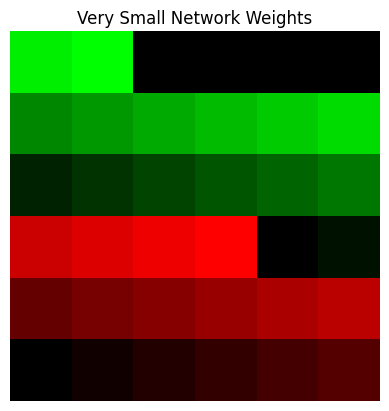

Visualization saved to /mnt/data/very_small_network_weights.png


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os

# Define a very small network
class VerySmallNetwork(nn.Module):
    def __init__(self):
        super(VerySmallNetwork, self).__init__()
        self.fc1 = nn.Linear(4, 4)  # 4 input neurons, 4 hidden neurons
        self.fc2 = nn.Linear(4, 4)  # 4 hidden neurons, 4 output neurons

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Ensure the directory exists
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Create a very small network
model = VerySmallNetwork()

# Manually set weights
with torch.no_grad():
    model.fc1.weight = nn.Parameter(torch.tensor([[0.1, 0.2, 0.3, 0.4],
                                                  [0.5, 0.6, 0.7, 0.8],
                                                  [0.9, 1.0, 1.1, 1.2],
                                                  [1.3, 1.4, 1.5, 1.6]]))
    model.fc1.bias = nn.Parameter(torch.tensor([0.1, 0.2, 0.3, 0.4]))

    model.fc2.weight = nn.Parameter(torch.tensor([[0.1, 0.2, 0.3, 0.4],
                                                  [0.5, 0.6, 0.7, 0.8],
                                                  [0.9, 1.0, 1.1, 1.2],
                                                  [1.3, 1.4, 1.5, 1.6]]))
    model.fc2.bias = nn.Parameter(torch.tensor([0.1, 0.2, 0.3, 0.4]))

# Define RGB values for colors
colors = {
    'red': [1, 0, 0],
    'green': [0, 1, 0],
    'blue': [0, 0, 1],
    'cyan': [0, 1, 1],
    'yellow': [1, 1, 0],
    'magenta': [1, 0, 1]
}
color_list = list(colors.values())

# Function to visualize all layers' weights in a single image according to the layout
def visualize_all_layers_as_image(model):
    all_weights = [layer.weight.data.numpy().flatten() for layer in model.children() if isinstance(layer, nn.Linear)]

    normalized_weights = []
    for weights in all_weights:
        min_w, max_w = weights.min(), weights.max()
        norm_weights = (weights - min_w) / (max_w - min_w) if max_w > min_w else np.zeros_like(weights)
        normalized_weights.append(norm_weights)

    concatenated_weights = np.concatenate(normalized_weights)
    num_elements = concatenated_weights.size
    side_length = int(np.ceil(np.sqrt(num_elements)))
    padded_weights = np.zeros((side_length, side_length))
    padded_weights.flat[:num_elements] = concatenated_weights

    rgb_image = np.zeros((side_length, side_length, 3))
    start_idx = 0

    for i, norm_weights in enumerate(normalized_weights):
        layer_size = norm_weights.size
        end_idx = start_idx + layer_size
        layer_color = np.array(color_list[i % len(color_list)])

        for idx in range(layer_size):
            pos = divmod(start_idx + idx, side_length)
            rgb_image[pos[0], pos[1]] = norm_weights[idx] * layer_color

        start_idx = end_idx

    rgb_image = np.flipud(rgb_image)  # Flip the image to have the input layer at the bottom
    image_path = os.path.join(output_dir, 'very_small_network_weights.png')
    plt.imsave(image_path, rgb_image)
    plt.imshow(rgb_image)
    plt.title('Very Small Network Weights')
    plt.axis('off')
    plt.show()

    return image_path

# Example usage
image_path = visualize_all_layers_as_image(model)
if image_path:
    print(f'Visualization saved to {image_path}')


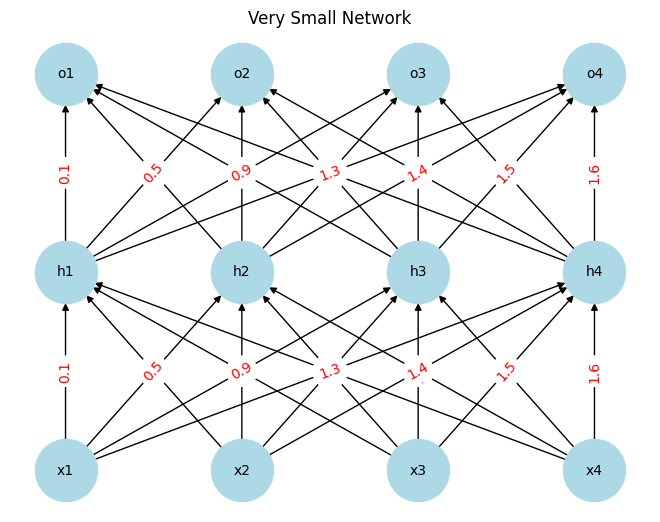

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the network
G = nx.DiGraph()

# Add nodes for each layer
input_layer = ['x1', 'x2', 'x3', 'x4']
hidden_layer = ['h1', 'h2', 'h3', 'h4']
output_layer = ['o1', 'o2', 'o3', 'o4']

G.add_nodes_from(input_layer, layer=0)
G.add_nodes_from(hidden_layer, layer=1)
G.add_nodes_from(output_layer, layer=2)

# Define the positions of the nodes
pos = {
    'x1': (0, 0), 'x2': (1, 0), 'x3': (2, 0), 'x4': (3, 0),
    'h1': (0, 1), 'h2': (1, 1), 'h3': (2, 1), 'h4': (3, 1),
    'o1': (0, 2), 'o2': (1, 2), 'o3': (2, 2), 'o4': (3, 2)
}

# Add edges with weights
weights = {
    ('x1', 'h1'): 0.1, ('x2', 'h1'): 0.2, ('x3', 'h1'): 0.3, ('x4', 'h1'): 0.4,
    ('x1', 'h2'): 0.5, ('x2', 'h2'): 0.6, ('x3', 'h2'): 0.7, ('x4', 'h2'): 0.8,
    ('x1', 'h3'): 0.9, ('x2', 'h3'): 1.0, ('x3', 'h3'): 1.1, ('x4', 'h3'): 1.2,
    ('x1', 'h4'): 1.3, ('x2', 'h4'): 1.4, ('x3', 'h4'): 1.5, ('x4', 'h4'): 1.6,
    ('h1', 'o1'): 0.1, ('h2', 'o1'): 0.2, ('h3', 'o1'): 0.3, ('h4', 'o1'): 0.4,
    ('h1', 'o2'): 0.5, ('h2', 'o2'): 0.6, ('h3', 'o2'): 0.7, ('h4', 'o2'): 0.8,
    ('h1', 'o3'): 0.9, ('h2', 'o3'): 1.0, ('h3', 'o3'): 1.1, ('h4', 'o3'): 1.2,
    ('h1', 'o4'): 1.3, ('h2', 'o4'): 1.4, ('h3', 'o4'): 1.5, ('h4', 'o4'): 1.6
}

for (start, end), weight in weights.items():
    G.add_edge(start, end, weight=weight)

# Draw the network
edge_labels = {(start, end): f'{weight:.1f}' for (start, end), weight in weights.items()}
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Very Small Network")
plt.show()

# Aufgabe 8
You have to rougly draw the topology with it's weights from the given RGB image

Normalized weights for layer:
[[0.         0.06666667 0.13333334 0.46666667]
 [0.26666668 0.33333334 0.39999998 0.46666667]
 [0.5333333  0.59999996 0.6666667  0.73333335]
 [0.79999995 0.8666666  0.93333334 1.        ]]

Normalized weights for layer:
[[0.         0.06666667 0.13333334 0.2       ]
 [0.26666668 0.33333334 0.39999998 0.46666667]
 [0.5333333  0.59999996 0.6666667  0.73333335]
 [0.79999995 0.8666666  0.93333334 1.        ]]



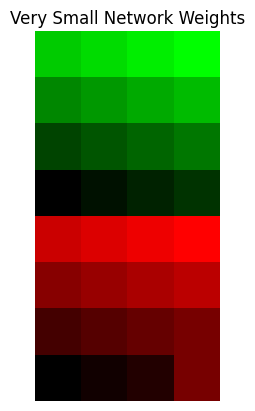

Visualization saved to /mnt/data/very_small_network_weights.png


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os

# Define a very small network
class VerySmallNetwork(nn.Module):
    def __init__(self):
        super(VerySmallNetwork, self).__init__()
        self.fc1 = nn.Linear(4, 4)  # 4 input neurons, 4 hidden neurons
        self.fc2 = nn.Linear(4, 4)  # 4 hidden neurons, 4 output neurons

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Ensure the directory exists
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Create a very small network
model = VerySmallNetwork()

# Manually set weights
with torch.no_grad():
    model.fc1.weight = nn.Parameter(torch.tensor([[0.1, 0.2, 0.3, 0.8],
                                                  [0.5, 0.6, 0.7, 0.8],
                                                  [0.9, 1.0, 1.1, 1.2],
                                                  [1.3, 1.4, 1.5, 1.6]]))
    model.fc1.bias = nn.Parameter(torch.tensor([0.1, 0.2, 0.3, 0.4]))

    model.fc2.weight = nn.Parameter(torch.tensor([[0.1, 0.2, 0.3, 0.4],
                                                  [0.5, 0.6, 0.7, 0.8],
                                                  [0.9, 1.0, 1.1, 1.2],
                                                  [1.3, 1.4, 1.5, 1.6]]))
    model.fc2.bias = nn.Parameter(torch.tensor([0.1, 0.2, 0.3, 0.4]))

# Define RGB values for red and green
colors = {
    'red': [1, 0, 0],
    'green': [0, 1, 0]
}
color_list = list(colors.values())

# Function to visualize all layers' weights in a single image according to the layout
def visualize_all_layers_as_image(model):
    all_weights = [layer.weight.data.numpy() for layer in model.children() if isinstance(layer, nn.Linear)]

    # Normalize weights to [0, 1]
    normalized_weights = []
    for weights in all_weights:
        min_w, max_w = weights.min(), weights.max()
        norm_weights = (weights - min_w) / (max_w - min_w) if max_w > min_w else np.zeros_like(weights)
        normalized_weights.append(norm_weights)

        print(f"Normalized weights for layer:\n{norm_weights}\n")

    # Create a matrix to hold all the weights
    num_rows = sum(w.shape[0] for w in normalized_weights)
    num_cols = normalized_weights[0].shape[1]

    reshaped_weights = np.zeros((num_rows, num_cols))

    # Fill the weight matrix
    row_start = 0
    for norm_weights in normalized_weights:
        num_neurons = norm_weights.shape[0]
        reshaped_weights[row_start:row_start + num_neurons, :] = norm_weights
        row_start += num_neurons

    # Create an RGB image
    rgb_image = np.zeros((num_rows, num_cols, 3))
    for i in range(num_rows):
        layer_color = np.array(color_list[0 if i < 4 else 1])  # Use red for the first 4 rows (input to hidden), green for the next 4 (hidden to output)
        for j in range(num_cols):
            rgb_image[i, j] = reshaped_weights[i, j] * layer_color

    # Flip the image to have the input layer at the bottom
    rgb_image = np.flipud(rgb_image)
    image_path = os.path.join(output_dir, 'very_small_network_weights.png')
    plt.imsave(image_path, rgb_image)
    plt.imshow(rgb_image)
    plt.title('Very Small Network Weights')
    plt.axis('off')
    plt.show()

    return image_path

# Example usage
image_path = visualize_all_layers_as_image(model)
if image_path:
    print(f'Visualization saved to {image_path}')


# Aufgabe 9

Draw a very simple network with the last task

Normalized weights for layer:
[[1.         0.        ]
 [0.28571427 0.42857146]]

Normalized weights for layer:
[[0.         1.        ]
 [0.37499997 0.2500001 ]]



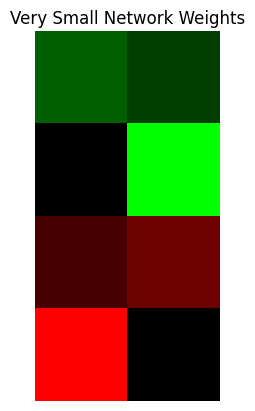

Visualization saved to /mnt/data/very_small_network_weights.png


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os

# Define a very small network
class VerySmallNetwork(nn.Module):
    def __init__(self):
        super(VerySmallNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # 2 input neurons, 2 hidden neurons
        self.fc2 = nn.Linear(2, 2)  # 2 hidden neurons, 2 output neurons

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Ensure the directory exists
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Create a very small network
model = VerySmallNetwork()

# Manually set weights
with torch.no_grad():
    model.fc1.weight = nn.Parameter(torch.tensor([[1, 0.3], [0.5, 0.6]]))
    #model.fc1.bias = nn.Parameter(torch.tensor([0.1, 0.2]))
    model.fc2.weight = nn.Parameter(torch.tensor([[1, 1.8], [1.3, 1.2]]))
   # model.fc2.bias = nn.Parameter(torch.tensor([0.1, 0.2]))

# Define RGB values for red and green
colors = {
    'red': [1, 0, 0],
    'green': [0, 1, 0]
}
color_list = list(colors.values())

# Function to visualize all layers' weights in a single image according to the layout
def visualize_all_layers_as_image(model):
    all_weights = [layer.weight.data.numpy() for layer in model.children() if isinstance(layer, nn.Linear)]

    # Normalize weights to [0, 1]
    normalized_weights = []
    for weights in all_weights:
        min_w, max_w = weights.min(), weights.max()
        norm_weights = (weights - min_w) / (max_w - min_w) if max_w > min_w else np.zeros_like(weights)
        normalized_weights.append(norm_weights)

        print(f"Normalized weights for layer:\n{norm_weights}\n")

    # Create a matrix to hold all the weights
    num_rows = sum(w.shape[0] for w in normalized_weights)
    num_cols = normalized_weights[0].shape[1]

    reshaped_weights = np.zeros((num_rows, num_cols))

    # Fill the weight matrix
    row_start = 0
    for norm_weights in normalized_weights:
        num_neurons = norm_weights.shape[0]
        reshaped_weights[row_start:row_start + num_neurons, :] = norm_weights
        row_start += num_neurons

    # Create an RGB image
    rgb_image = np.zeros((num_rows, num_cols, 3))
    for i in range(num_rows):
        layer_color = np.array(color_list[0 if i < 2 else 1])  # Use red for the first 2 rows (input to hidden), green for the next 2 (hidden to output)
        for j in range(num_cols):
            rgb_image[i, j] = reshaped_weights[i, j] * layer_color

    # Flip the image to have the input layer at the bottom
    rgb_image = np.flipud(rgb_image)
    image_path = os.path.join(output_dir, 'very_small_network_weights.png')
    plt.imsave(image_path, rgb_image)
    plt.imshow(rgb_image)
    plt.title('Very Small Network Weights')
    plt.axis('off')
    plt.show()

    return image_path

# Example usage
image_path = visualize_all_layers_as_image(model)
if image_path:
    print(f'Visualization saved to {image_path}')


# Aufgabe 10
send me the visualisation of the following networks.
Each list represents the number of neurons per layer from output to input.
Each layer is fully connected to the previous layer.
Network 1.) [1,2,4,8,16]
Network 2.) [16,8,16,4,16]
Network 3.) [32,4,16,8,32]

Normalized weights for layer:
[[1.]
 [0.]]

Normalized weights for layer:
[[0.9750479  0.        ]
 [0.7762444  0.09070195]
 [1.         0.71451664]
 [0.3422292  0.97434294]]

Normalized weights for layer:
[[2.9438360e-02 5.3874892e-01 4.0662539e-01 4.4747859e-02]
 [8.8802040e-01 1.6000801e-01 3.4899104e-01 7.3445368e-01]
 [7.5396109e-01 8.6271310e-01 0.0000000e+00 7.1784908e-01]
 [2.3253742e-01 6.3755208e-01 4.6044886e-01 5.8086693e-01]
 [7.6348746e-01 5.3672683e-01 2.2407737e-01 9.0090686e-01]
 [1.9567482e-01 4.8683197e-04 8.6711776e-01 5.9387308e-01]
 [3.7014675e-01 1.0000000e+00 5.6516147e-01 7.4100393e-01]
 [1.4566839e-01 2.8811714e-01 5.1659528e-02 4.6834302e-01]]

Normalized weights for layer:
[[0.7341204  0.6240781  0.28691986 0.89062965 0.8233773  0.12565531
  0.5567703  0.1831874 ]
 [0.43156883 0.5635977  0.9162899  0.38849092 0.03312976 0.39513254
  0.9214629  0.80550003]
 [0.9674533  0.38328725 0.8128201  0.13591298 0.6649267  0.16777363
  0.4504153  0.9201842 ]
 [0.0347225

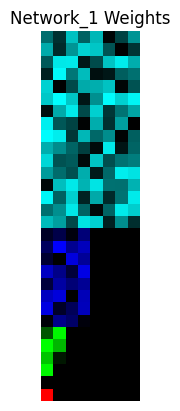

Visualization saved to /mnt/data/Network_1_weights.png
Normalized weights for layer:
[[9.79119420e-01 3.79593253e-01 6.94568396e-01 1.85715497e-01
  2.65956670e-01 9.31313515e-01 5.39239526e-01 1.99209586e-01
  1.58391625e-01 6.60512388e-01 2.91203350e-01 1.56484351e-01
  7.86317706e-01 9.97313678e-01 6.73582971e-01 5.17760396e-01]
 [9.28482294e-01 1.46461919e-01 3.40865254e-01 4.74391490e-01
  2.11254582e-01 1.41453847e-01 5.26379049e-02 8.75604749e-01
  4.56964761e-01 1.99006736e-01 8.57955992e-01 8.04011583e-01
  8.97574425e-01 5.14375627e-01 3.69671702e-01 5.91822788e-02]
 [8.87142360e-01 4.12772685e-01 1.30183667e-01 7.85363197e-01
  0.00000000e+00 3.12062114e-01 3.22315358e-02 7.32845604e-01
  2.83448100e-01 5.77733397e-01 3.78364384e-01 1.04128830e-01
  5.10510087e-01 1.49536923e-01 4.39429611e-01 9.37365472e-01]
 [4.78053153e-01 8.36184382e-01 5.66376094e-03 1.60678387e-01
  9.58184898e-01 8.62908244e-01 8.74018371e-01 3.63014154e-02
  3.95912409e-01 8.73755455e-01 8.07422251e-

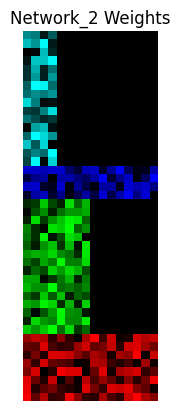

Visualization saved to /mnt/data/Network_2_weights.png
Normalized weights for layer:
[[0.4390374  0.4735661  0.41145763 0.33982366 0.15337902 0.61214894
  0.17683846 0.00653204 0.4120268  0.5758564  0.43222713 0.28415447
  0.22474469 0.09082364 0.22022672 0.46684432 0.6347111  0.9579891
  0.3196444  0.49689648 0.3521851  0.10673905 0.9946908  0.08706829
  0.9260283  0.7930787  0.59301597 0.29073665 0.13155092 0.40767634
  0.12946516 0.2114949 ]
 [0.8031534  0.51254517 0.3028336  0.5912201  0.68678766 0.74538255
  0.28332394 0.02862367 0.06439399 0.5819117  0.52247363 0.22719577
  0.9757777  0.05434179 0.43318093 0.83566415 0.26222107 0.4914393
  0.1002942  0.1600189  0.9946816  0.53314686 0.19940618 0.57114595
  0.03664265 0.51294255 0.6209288  0.5135447  0.21831462 0.23140848
  0.6733215  0.5082188 ]
 [0.960536   0.5526996  0.02365188 0.62407    0.1383232  0.4601914
  0.4634034  0.9741649  0.6404369  0.35425332 0.4208108  0.04458093
  0.5436632  0.7878482  0.7081552  0.5785452  0.1144

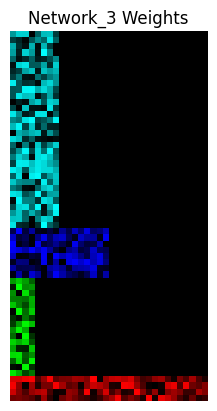

Visualization saved to /mnt/data/Network_3_weights.png


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os

class VariableNetwork(nn.Module):
    def __init__(self, layers):
        super(VariableNetwork, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layers) - 1):
            self.layers.append(nn.Linear(layers[i], layers[i+1]))

    def forward(self, x):
        for layer in self.layers:
            x = torch.relu(layer(x))
        return x

# Ensure the directory exists
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Function to create a network with given layer sizes and visualize its weights
def create_and_visualize_network(layer_sizes, network_name):
    model = VariableNetwork(layer_sizes)

    # Manually set weights (for simplicity, we'll use random values in this example)
    for layer in model.layers:
        with torch.no_grad():
            layer.weight = nn.Parameter(torch.rand_like(layer.weight))
            layer.bias = nn.Parameter(torch.rand_like(layer.bias))

    # Define RGB values for different layers
    colors = {
        'red': [1, 0, 0],
        'green': [0, 1, 0],
        'blue': [0, 0, 1],
        'cyan': [0, 1, 1],
        'yellow': [1, 1, 0],
        'magenta': [1, 0, 1]
    }
    color_list = list(colors.values())

    # Function to visualize all layers' weights in a single image according to the layout
    def visualize_all_layers_as_image(model, network_name):
        all_weights = [layer.weight.data.numpy() for layer in model.layers]

        # Normalize weights to [0, 1]
        normalized_weights = []
        for weights in all_weights:
            min_w, max_w = weights.min(), weights.max()
            norm_weights = (weights - min_w) / (max_w - min_w) if max_w > min_w else np.zeros_like(weights)
            normalized_weights.append(norm_weights)

            print(f"Normalized weights for layer:\n{norm_weights}\n")

        # Create a matrix to hold all the weights
        max_neurons = max(layer.weight.shape[1] for layer in model.layers)
        num_rows = sum(layer.weight.shape[0] for layer in model.layers)
        num_cols = max_neurons

        reshaped_weights = np.zeros((num_rows, num_cols))

        # Fill the weight matrix
        row_start = 0
        layer_starts = []
        for norm_weights in normalized_weights:
            num_neurons = norm_weights.shape[0]
            reshaped_weights[row_start:row_start + num_neurons, :norm_weights.shape[1]] = norm_weights
            layer_starts.append((row_start, row_start + num_neurons))
            row_start += num_neurons

        # Create an RGB image
        rgb_image = np.zeros((num_rows, num_cols, 3))
        for i in range(num_rows):
            # Find the correct layer color based on the row index
            for idx, (start, end) in enumerate(layer_starts):
                if start <= i < end:
                    layer_color = np.array(color_list[idx % len(color_list)])  # Cycle through colors for each layer
                    break
            for j in range(num_cols):
                if j < reshaped_weights.shape[1]:  # Check to avoid indexing outside the weight matrix
                    rgb_image[i, j] = reshaped_weights[i, j] * layer_color

        # Flip the image to have the input layer at the bottom
        rgb_image = np.flipud(rgb_image)
        image_path = os.path.join(output_dir, f'{network_name}_weights.png')
        plt.imsave(image_path, rgb_image)
        plt.imshow(rgb_image)
        plt.title(f'{network_name} Weights')
        plt.axis('off')
        plt.show()

        return image_path

    # Visualize the network
    image_path = visualize_all_layers_as_image(model, network_name)
    if image_path:
        print(f'Visualization saved to {image_path}')

# Define the networks
networks = {
    "Network_1": [1, 2, 4, 8, 16],
    "Network_2": [16, 8, 16, 4, 16],
    "Network_3": [32, 4, 16, 8, 32]
}

# Create and visualize each network individually
for network_name, layer_sizes in networks.items():
    create_and_visualize_network(layer_sizes, network_name)


# Aufgabe 11
the topology looks correct. Can you do this the following way:
- layers closer to the output layer at the top of the image
- color intensity according to the size of the weight
- given any network topology, i.e. for the minGPT network?

Normalized weights for layer 0 part 0:
[[0.79490256 0.7683264  0.8002428  ... 0.91006005 0.764741   0.16757898]
 [0.5534729  0.9877946  0.55727637 ... 0.10070112 0.9133598  0.7241721 ]
 [0.8185751  0.23856711 0.6908292  ... 0.88677204 0.66382945 0.22504932]
 ...
 [0.7513744  0.94137627 0.57177633 ... 0.3723751  0.42152384 0.14430031]
 [0.19342719 0.24564701 0.18552671 ... 0.44146585 0.49407238 0.75918   ]
 [0.06517495 0.07317467 0.5973161  ... 0.57015496 0.686791   0.11002669]]

Normalized weights for layer 0 part 1:
[[0.33793077 0.90326774 0.05753625 ... 0.27139637 0.39338744 0.32974163]
 [0.79027    0.8064968  0.20696011 ... 0.9141675  0.75365347 0.50899553]
 [0.4268006  0.58650243 0.65311956 ... 0.8688637  0.01957965 0.81981546]
 ...
 [0.266318   0.8266385  0.18410833 ... 0.04780049 0.51302403 0.2048411 ]
 [0.83667934 0.9424748  0.37362573 ... 0.03348917 0.51035404 0.47085434]
 [0.04251552 0.0199197  0.8513122  ... 0.07651866 0.02277303 0.915725  ]]

Normalized weights for layer 0 p

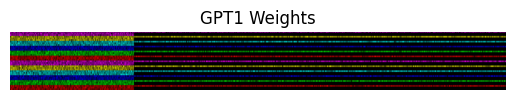

Visualization saved to /mnt/data/GPT1_weights.png


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the minGPT model
class GPT1(nn.Module):
    def __init__(self, vocab_size, n_embd, n_layer, n_head):
        super(GPT1, self).__init__()
        self.token_embedding = nn.Embedding(vocab_size, n_embd)
        self.positional_embedding = nn.Parameter(torch.zeros(1, 512, n_embd))  # Assuming max context size 512
        self.layers = nn.ModuleList([
            nn.TransformerEncoderLayer(n_embd, n_head, dim_feedforward=4*n_embd)
            for _ in range(n_layer)
        ])
        self.ln_f = nn.LayerNorm(n_embd)
        self.head = nn.Linear(n_embd, vocab_size, bias=False)

    def forward(self, idx):
        b, t = idx.size()
        pos = torch.arange(0, t, dtype=torch.long, device=idx.device).unsqueeze(0)
        tok_emb = self.token_embedding(idx)
        pos_emb = self.positional_embedding[:, :t, :]
        x = tok_emb + pos_emb
        for layer in self.layers:
            x = layer(x)
        x = self.ln_f(x)
        logits = self.head(x)
        return logits

# Ensure the directory exists
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Function to extract weights from transformer encoder layers
def extract_weights(model):
    weight_matrices = []
    for layer in model.layers:
        # Extract the weight matrices from self-attention and feedforward layers
        attention_weights = layer.self_attn.in_proj_weight.data.numpy()
        feedforward_weights1 = layer.linear1.weight.data.numpy()
        feedforward_weights2 = layer.linear2.weight.data.numpy()
        weight_matrices.extend([attention_weights, feedforward_weights1, feedforward_weights2])
    return weight_matrices

# Function to create a network with given layer sizes and visualize its weights
def create_and_visualize_network(vocab_size, n_embd, n_layer, n_head, network_name):
    model = GPT1(vocab_size, n_embd, n_layer, n_head)

    # Manually set weights (for simplicity, we'll use random values in this example)
    for layer in model.layers:
        with torch.no_grad():
            for param in layer.parameters():
                param.copy_(torch.rand_like(param))

    # Extract the relevant weights
    all_weights = extract_weights(model)

    # Define RGB values for different layers
    colors = {
        'red': [1, 0, 0],
        'green': [0, 1, 0],
        'blue': [0, 0, 1],
        'cyan': [0, 1, 1],
        'yellow': [1, 1, 0],
        'magenta': [1, 0, 1]
    }
    color_list = list(colors.values())

    # Function to visualize all layers' weights in a single image according to the layout
    def visualize_all_layers_as_image(weights, network_name):
        # Normalize weights to [0, 1]
        def normalize(weights):
            min_w, max_w = weights.min(), weights.max()
            return (weights - min_w) / (max_w - min_w) if max_w > min_w else np.zeros_like(weights)

        normalized_weights = [normalize(weight) for weight in weights]

        # Print out the normalized weights for each layer part
        for idx, norm_weights in enumerate(normalized_weights):
            layer_idx = idx // 3
            part_idx = idx % 3
            print(f"Normalized weights for layer {layer_idx} part {part_idx}:\n{norm_weights}\n")

        # Determine the layout for the visualization
        max_neurons = max(weight.shape[1] for weight in normalized_weights)
        num_layers = len(normalized_weights) // 3  # Each layer has three weight matrices
        layer_height = 10  # Height of each layer in the image

        img_height = num_layers * layer_height * 3  # Three parts per layer
        img_width = max_neurons

        rgb_image = np.zeros((img_height, img_width, 3))

        for idx, norm_weights in enumerate(normalized_weights):
            layer_idx = idx // 3
            layer_color = np.array(color_list[layer_idx % len(color_list)])
            for i in range(norm_weights.shape[0]):
                for j in range(norm_weights.shape[1]):
                    intensity = norm_weights[i, j]
                    rgb_image[idx * layer_height:(idx + 1) * layer_height, j] = intensity * layer_color

        # Flip the image to have the input layer at the bottom
        rgb_image = np.flipud(rgb_image)
        image_path = os.path.join(output_dir, f'{network_name}_weights.png')
        plt.imsave(image_path, rgb_image)
        plt.imshow(rgb_image)
        plt.title(f'{network_name} Weights')
        plt.axis('off')
        plt.show()

        return image_path

    # Visualize the network
    image_path = visualize_all_layers_as_image(all_weights, network_name)
    if image_path:
        print(f'Visualization saved to {image_path}')

# Define the network configuration for GPT-1
network_config = {
    "GPT1": (50257, 768, 12, 12)  # GPT-1 configuration
}

# Create and visualize the GPT-1 network
for network_name, (vocab_size, n_embd, n_layer, n_head) in network_config.items():
    create_and_visualize_network(vocab_size, n_embd, n_layer, n_head, network_name)


# Aufgabe 12


*   make the code able to visualize different networks
*  we have to visualize 29 million weights not just 184000
*   make the function Create and visualize to take the model
*   take each matrix and multiply it with layer color instead of nested for loops






Normalized weights for layer 0 part 0:
(2304, 768)

Normalized weights for layer 0 part 1:
(3072, 768)

Normalized weights for layer 0 part 2:
(768, 3072)

Normalized weights for layer 1 part 0:
(2304, 768)

Normalized weights for layer 1 part 1:
(3072, 768)

Normalized weights for layer 1 part 2:
(768, 3072)

Normalized weights for layer 2 part 0:
(2304, 768)

Normalized weights for layer 2 part 1:
(3072, 768)

Normalized weights for layer 2 part 2:
(768, 3072)

Normalized weights for layer 3 part 0:
(2304, 768)

Normalized weights for layer 3 part 1:
(3072, 768)

Normalized weights for layer 3 part 2:
(768, 3072)

Normalized weights for layer 4 part 0:
(2304, 768)

Normalized weights for layer 4 part 1:
(3072, 768)

Normalized weights for layer 4 part 2:
(768, 3072)

Normalized weights for layer 5 part 0:
(2304, 768)

Normalized weights for layer 5 part 1:
(3072, 768)

Normalized weights for layer 5 part 2:
(768, 3072)

Normalized weights for layer 6 part 0:
(2304, 768)

Normalized w

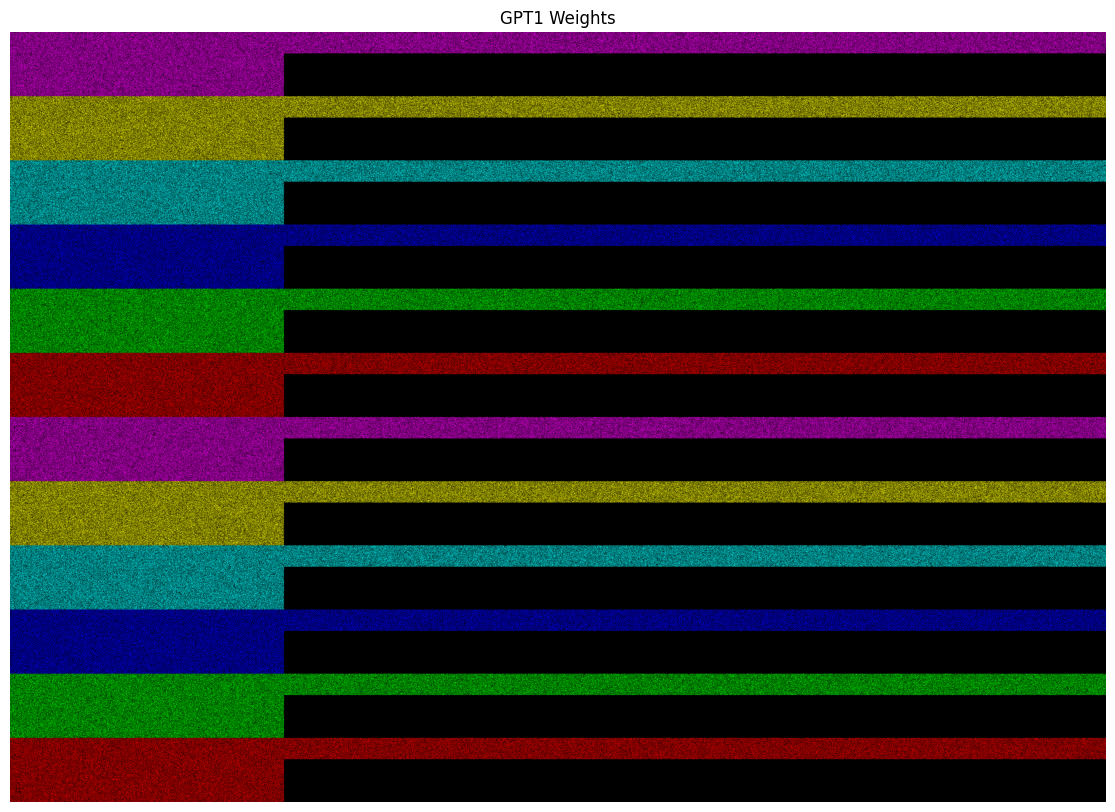

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the GPT-1 model
class GPT1(nn.Module):
    def __init__(self, vocab_size, n_embd, n_layer, n_head):
        super(GPT1, self).__init__()
        self.token_embedding = nn.Embedding(vocab_size, n_embd)
        self.positional_embedding = nn.Parameter(torch.zeros(1, 512, n_embd))  # Assuming max context size 512
        self.layers = nn.ModuleList([
            nn.TransformerEncoderLayer(n_embd, n_head, dim_feedforward=4*n_embd)
            for _ in range(n_layer)
        ])
        self.ln_f = nn.LayerNorm(n_embd)
        self.head = nn.Linear(n_embd, vocab_size, bias=False)

    def forward(self, idx):
        b, t = idx.size()
        pos = torch.arange(0, t, dtype=torch.long, device=idx.device).unsqueeze(0)
        tok_emb = self.token_embedding(idx)
        pos_emb = self.positional_embedding[:, :t, :]
        x = tok_emb + pos_emb
        for layer in self.layers:
            x = layer(x)
        x = self.ln_f(x)
        logits = self.head(x)
        return logits

# Ensure the directory exists
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Function to extract weights from transformer encoder layers
def extract_weights(model):
    weight_matrices = []
    for layer in model.layers:
        # Extract the weight matrices from self-attention and feedforward layers
        attention_weights = layer.self_attn.in_proj_weight.data.numpy()
        feedforward_weights1 = layer.linear1.weight.data.numpy()
        feedforward_weights2 = layer.linear2.weight.data.numpy()
        weight_matrices.extend([attention_weights, feedforward_weights1, feedforward_weights2])
    return weight_matrices

# Function to create a network with given layer sizes and visualize its weights
def create_and_visualize_network(vocab_size, n_embd, n_layer, n_head, network_name):
    model = GPT1(vocab_size, n_embd, n_layer, n_head)

    # Manually set weights (for simplicity, we'll use random values in this example)
    for layer in model.layers:
        with torch.no_grad():
            for param in layer.parameters():
                param.copy_(torch.rand_like(param))

    # Extract the relevant weights
    all_weights = extract_weights(model)

    # Define RGB values for different layers
    colors = np.array([
        [1, 0, 0],  # red
        [0, 1, 0],  # green
        [0, 0, 1],  # blue
        [0, 1, 1],  # cyan
        [1, 1, 0],  # yellow
        [1, 0, 1]   # magenta
    ])

    # Normalize weights to [0, 1]
    def normalize(weights):
        min_w, max_w = weights.min(), weights.max()
        return (weights - min_w) / (max_w - min_w) if max_w > min_w else np.zeros_like(weights)

    normalized_weights = [normalize(weight) for weight in all_weights]

    # Print out the normalized weights for each layer part
    for idx, norm_weights in enumerate(normalized_weights):
        layer_idx = idx // 3
        part_idx = idx % 3
        print(f"Normalized weights for layer {layer_idx} part {part_idx}:\n{norm_weights.shape}\n")

    # Determine the layout for the visualization
    max_neurons = max(weight.shape[1] for weight in normalized_weights)
    num_layers = len(normalized_weights) // 3  # Each layer has three weight matrices
    layer_height = 60  # Increased height of each layer in the image for better visualization

    img_height = num_layers * layer_height * 3  # Three parts per layer
    img_width = max_neurons

    rgb_image = np.zeros((img_height, img_width, 3))

    for idx, norm_weights in enumerate(normalized_weights):
        layer_idx = idx // 3
        layer_color = colors[layer_idx % len(colors)]
        norm_weights_expanded = norm_weights[:, :, np.newaxis] * layer_color
        norm_weights_tiled = np.tile(norm_weights_expanded, (layer_height, 1, 1))
        reshaped_height = norm_weights_tiled.shape[0]
        reshaped_width = norm_weights_tiled.shape[1]
        if reshaped_width > img_width:
            reshaped_width = img_width
        rgb_image[idx * layer_height: (idx + 1) * layer_height, :reshaped_width, :] = norm_weights_tiled[:layer_height, :reshaped_width, :]

    # Flip the image to have the input layer at the bottom
    rgb_image = np.flipud(rgb_image)
    image_path = os.path.join(output_dir, f'{network_name}_weights.png')
    plt.imsave(image_path, rgb_image)
    plt.figure(figsize=(20, 10))
    plt.imshow(rgb_image)
    plt.title(f'{network_name} Weights')
    plt.axis('off')
    plt.show()

    return image_path

# Define the network configuration for GPT-1
network_config = {
    "GPT1": (50257, 768, 12, 12)  # GPT-1 configuration
}

# Create and visualize the GPT-1 network
for network_name, (vocab_size, n_embd, n_layer, n_head) in network_config.items():
    create_and_visualize_network(vocab_size, n_embd, n_layer, n_head, network_name)


Normalized weights for layer 0 part 0:
(50257, 768)

Normalized weights for layer 0 part 1:
(2304, 768)

Normalized weights for layer 0 part 2:
(768, 768)

Normalized weights for layer 1 part 0:
(3072, 768)

Normalized weights for layer 1 part 1:
(768, 3072)

Normalized weights for layer 1 part 2:
(768, 768)

Normalized weights for layer 2 part 0:
(3072, 768)

Normalized weights for layer 2 part 1:
(768, 3072)

Normalized weights for layer 2 part 2:
(2304, 768)

Normalized weights for layer 3 part 0:
(768, 768)

Normalized weights for layer 3 part 1:
(3072, 768)

Normalized weights for layer 3 part 2:
(768, 3072)

Normalized weights for layer 4 part 0:
(768, 768)

Normalized weights for layer 4 part 1:
(3072, 768)

Normalized weights for layer 4 part 2:
(768, 3072)

Normalized weights for layer 5 part 0:
(2304, 768)

Normalized weights for layer 5 part 1:
(768, 768)

Normalized weights for layer 5 part 2:
(3072, 768)

Normalized weights for layer 6 part 0:
(768, 3072)

Normalized weigh

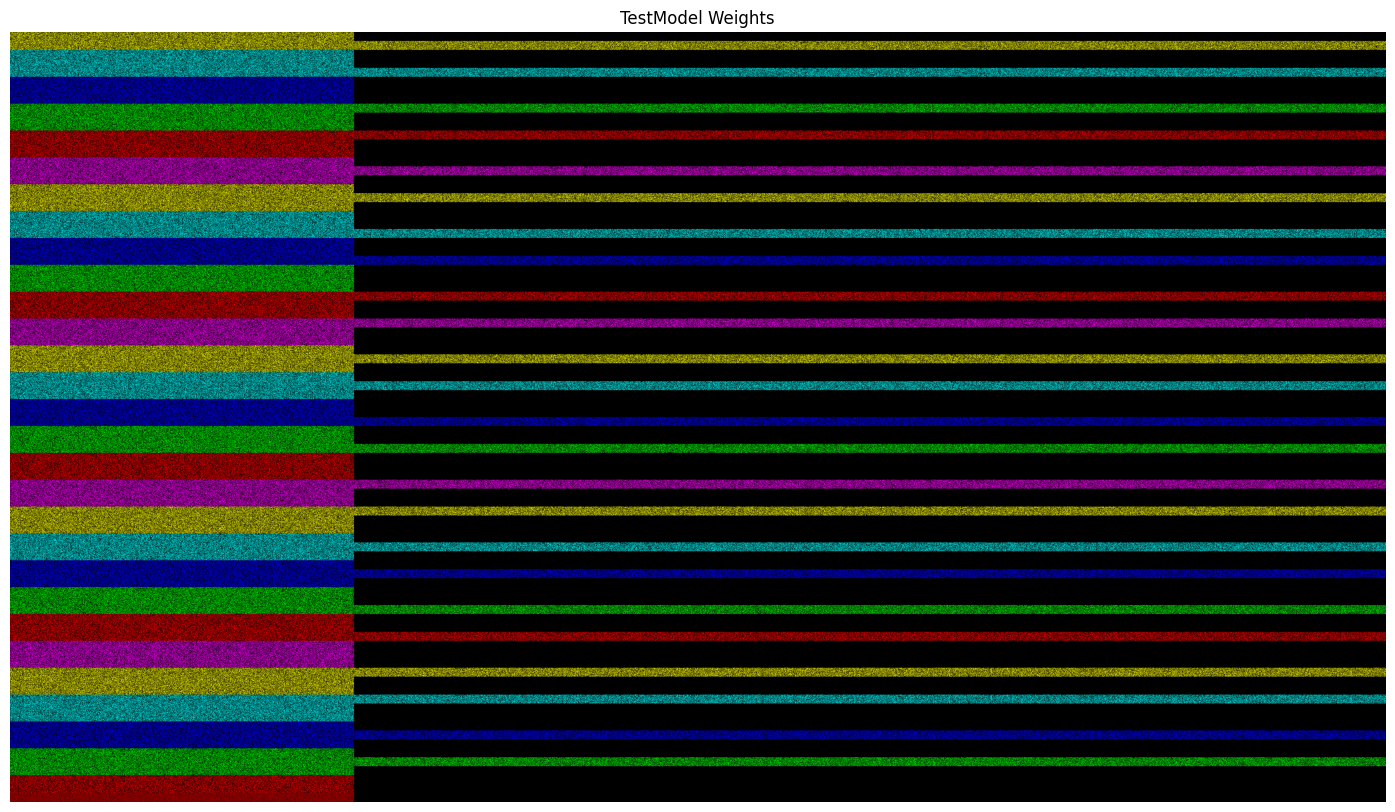

'/mnt/data/TestModel_weights.png'

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure the directory exists
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Function to extract weights from the model layers
def extract_weights(model):
    weight_matrices = []
    for layer in model.modules():
        if isinstance(layer, (nn.Linear, nn.Conv2d, nn.Embedding, nn.TransformerEncoderLayer)):
            for param in layer.parameters():
                if param.requires_grad and param.ndim >= 2:
                    weight_matrices.append(param.data.cpu().numpy())
    return weight_matrices

# Function to create a network with given layer sizes and visualize its weights
def create_and_visualize_network(model, network_name):
    # Extract the relevant weights
    all_weights = extract_weights(model)

    # Define RGB values for different layers
    colors = np.array([
        [1, 0, 0],  # red
        [0, 1, 0],  # green
        [0, 0, 1],  # blue
        [0, 1, 1],  # cyan
        [1, 1, 0],  # yellow
        [1, 0, 1]   # magenta
    ])

    # Normalize weights to [0, 1]
    def normalize(weights):
        min_w, max_w = weights.min(), weights.max()
        return (weights - min_w) / (max_w - min_w) if max_w > min_w else np.zeros_like(weights)

    normalized_weights = [normalize(weight) for weight in all_weights]

    # Print out the normalized weights for each layer part
    for idx, norm_weights in enumerate(normalized_weights):
        layer_idx = idx // 3
        part_idx = idx % 3
        print(f"Normalized weights for layer {layer_idx} part {part_idx}:\n{norm_weights.shape}\n")

    # Determine the layout for the visualization
    max_neurons = max(weight.shape[1] for weight in normalized_weights)
    num_layers = len(normalized_weights)  # Adjusted for the general case
    layer_height = 20  # Reduced height of each layer in the image for better visualization

    img_height = num_layers * layer_height  # Adjusted for the general case
    img_width = max_neurons

    rgb_image = np.zeros((img_height, img_width, 3))

    for idx, norm_weights in enumerate(normalized_weights):
        layer_idx = idx // 3
        layer_color = colors[layer_idx % len(colors)]
        norm_weights_expanded = norm_weights[:, :, np.newaxis] * layer_color

        # Calculate the slice of the image to fill
        slice_height = layer_height if norm_weights_expanded.shape[0] > layer_height else norm_weights_expanded.shape[0]
        slice_width = norm_weights_expanded.shape[1]

        # Fill the corresponding slice in the RGB image
        rgb_image[idx * layer_height: idx * layer_height + slice_height, :slice_width, :] = norm_weights_expanded[:slice_height, :slice_width, :]

    # Flip the image to have the input layer at the bottom
    rgb_image = np.flipud(rgb_image)
    image_path = os.path.join(output_dir, f'{network_name}_weights.png')
    plt.imsave(image_path, rgb_image)
    plt.figure(figsize=(20, 10))
    plt.imshow(rgb_image)
    plt.title(f'{network_name} Weights')
    plt.axis('off')
    plt.show()

    return image_path

# Define a test model for visualization
class TestModel(nn.Module):
    def __init__(self):
        super(TestModel, self).__init__()
        self.embedding = nn.Embedding(50257, 768)
        self.transformer_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(768, 12, dim_feedforward=3072)
            for _ in range(12)
        ])
        self.ln_f = nn.LayerNorm(768)
        self.head = nn.Linear(768, 50257, bias=False)

    def forward(self, idx):
        tok_emb = self.embedding(idx)
        for layer in self.transformer_layers:
            tok_emb = layer(tok_emb)
        x = self.ln_f(tok_emb)
        logits = self.head(x)
        return logits

# Create and visualize the TestModel network
model = TestModel()
create_and_visualize_network(model, "TestModel")


Normalized weights for layer 0 part 0:
(2304, 768)

Normalized weights for layer 0 part 1:
(3072, 768)

Normalized weights for layer 0 part 2:
(768, 3072)

Normalized weights for layer 1 part 0:
(2304, 768)

Normalized weights for layer 1 part 1:
(3072, 768)

Normalized weights for layer 1 part 2:
(768, 3072)

Normalized weights for layer 2 part 0:
(2304, 768)

Normalized weights for layer 2 part 1:
(3072, 768)

Normalized weights for layer 2 part 2:
(768, 3072)

Normalized weights for layer 3 part 0:
(2304, 768)

Normalized weights for layer 3 part 1:
(3072, 768)

Normalized weights for layer 3 part 2:
(768, 3072)

Normalized weights for layer 4 part 0:
(2304, 768)

Normalized weights for layer 4 part 1:
(3072, 768)

Normalized weights for layer 4 part 2:
(768, 3072)

Normalized weights for layer 5 part 0:
(2304, 768)

Normalized weights for layer 5 part 1:
(3072, 768)

Normalized weights for layer 5 part 2:
(768, 3072)

Normalized weights for layer 6 part 0:
(2304, 768)

Normalized w

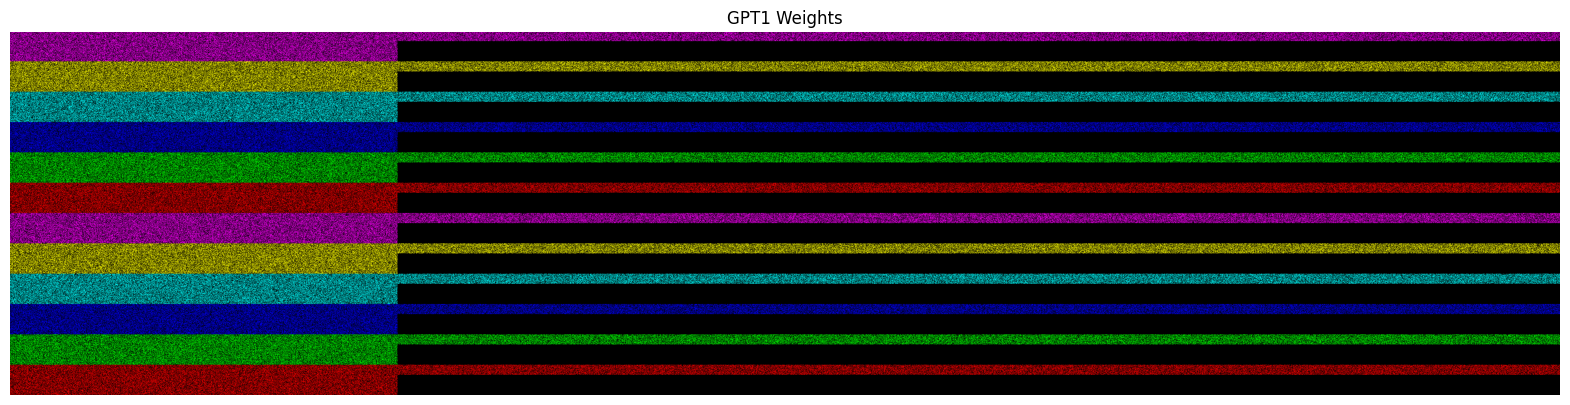

Normalized weights for layer 0 part 0:
(20, 10)

Normalized weights for layer 0 part 1:
(30, 20)

Normalized weights for layer 0 part 2:
(40, 30)

Normalized weights for layer 1 part 0:
(50, 40)



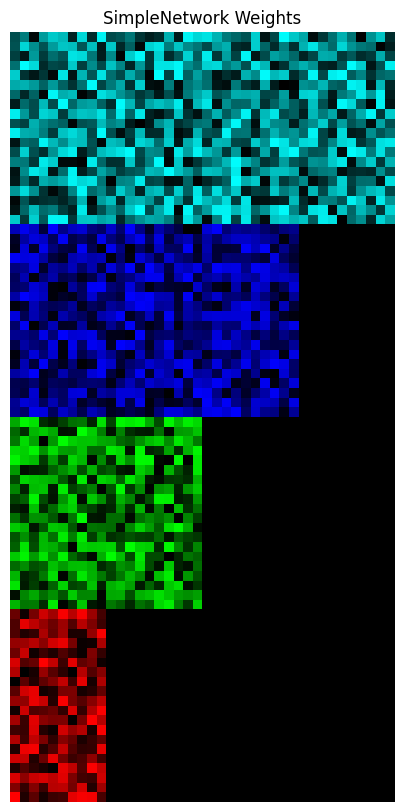

'/mnt/data/SimpleNetwork_weights.png'

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure the directory exists
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Define the GPT-1 model
class GPT1(nn.Module):
    def __init__(self, vocab_size, n_embd, n_layer, n_head):
        super(GPT1, self).__init__()
        self.token_embedding = nn.Embedding(vocab_size, n_embd)
        self.positional_embedding = nn.Parameter(torch.zeros(1, 512, n_embd))  # Assuming max context size 512
        self.layers = nn.ModuleList([
            nn.TransformerEncoderLayer(n_embd, n_head, dim_feedforward=4*n_embd)
            for _ in range(n_layer)
        ])
        self.ln_f = nn.LayerNorm(n_embd)
        self.head = nn.Linear(n_embd, vocab_size, bias=False)

    def forward(self, idx):
        b, t = idx.size()
        pos = torch.arange(0, t, dtype=torch.long, device=idx.device).unsqueeze(0)
        tok_emb = self.token_embedding(idx)
        pos_emb = self.positional_embedding[:, :t, :]
        x = tok_emb + pos_emb
        for layer in self.layers:
            x = layer(x)
        x = self.ln_f(x)
        logits = self.head(x)
        return logits

# Define a simple feedforward neural network
class SimpleNetwork(nn.Module):
    def __init__(self, layer_sizes):
        super(SimpleNetwork, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))

    def forward(self, x):
        for layer in self.layers:
            x = torch.relu(layer(x))
        return x

# Function to extract weights from the model layers
def extract_weights(model):
    weight_matrices = []
    for layer in model.modules():
        if isinstance(layer, nn.TransformerEncoderLayer):
            # Extract attention and feedforward weights
            attention_weights = layer.self_attn.in_proj_weight.data.cpu().numpy()
            feedforward_weights1 = layer.linear1.weight.data.cpu().numpy()
            feedforward_weights2 = layer.linear2.weight.data.cpu().numpy()
            weight_matrices.extend([attention_weights, feedforward_weights1, feedforward_weights2])
        elif isinstance(layer, nn.Linear) and not isinstance(model, GPT1):
            weight_matrices.append(layer.weight.data.cpu().numpy())
    return weight_matrices

# Function to create and visualize the network weights
def create_and_visualize_network(model, network_name):
    # Extract the relevant weights
    all_weights = extract_weights(model)

    # Define RGB values for different layers
    colors = np.array([
        [1, 0, 0],  # red
        [0, 1, 0],  # green
        [0, 0, 1],  # blue
        [0, 1, 1],  # cyan
        [1, 1, 0],  # yellow
        [1, 0, 1]   # magenta
    ])

    # Normalize weights to [0, 1]
    def normalize(weights):
        min_w, max_w = weights.min(), weights.max()
        return (weights - min_w) / (max_w - min_w) if max_w > min_w else np.zeros_like(weights)

    normalized_weights = [normalize(weight) for weight in all_weights]

    # Print out the normalized weights for each layer part
    for idx, norm_weights in enumerate(normalized_weights):
        layer_idx = idx // 3
        part_idx = idx % 3
        print(f"Normalized weights for layer {layer_idx} part {part_idx}:\n{norm_weights.shape}\n")

    # Determine the layout for the visualization
    max_neurons = max(weight.shape[1] for weight in normalized_weights)
    num_layers = len(normalized_weights) // 3 if isinstance(model, GPT1) else len(normalized_weights)
    layer_height = 20  # Adjust the height for better visualization

    img_height = num_layers * layer_height * (3 if isinstance(model, GPT1) else 1)
    img_width = max_neurons

    rgb_image = np.zeros((img_height, img_width, 3))

    for idx, norm_weights in enumerate(normalized_weights):
        layer_idx = idx // 3 if isinstance(model, GPT1) else idx
        layer_color = colors[layer_idx % len(colors)]
        norm_weights_expanded = norm_weights[:, :, np.newaxis] * layer_color

        # Calculate the slice of the image to fill
        slice_height = layer_height if norm_weights_expanded.shape[0] > layer_height else norm_weights_expanded.shape[0]
        slice_width = norm_weights_expanded.shape[1]

        # Fill the corresponding slice in the RGB image
        for h in range(slice_height):
            if idx * layer_height + h < img_height:
                reshaped_width = min(norm_weights_expanded.shape[1], img_width)
                rgb_image[idx * layer_height + h, :reshaped_width, :] = norm_weights_expanded[h, :reshaped_width, :]

    # Flip the image to have the input layer at the bottom
    rgb_image = np.flipud(rgb_image)
    image_path = os.path.join(output_dir, f'{network_name}_weights.png')
    plt.imsave(image_path, rgb_image)
    plt.figure(figsize=(20, 10))
    plt.imshow(rgb_image)
    plt.title(f'{network_name} Weights')
    plt.axis('off')
    plt.show()

    return image_path

# Create and visualize the GPT-1 network
gpt_model = GPT1(vocab_size=50257, n_embd=768, n_layer=12, n_head=12)
create_and_visualize_network(gpt_model, "GPT1")

# Define the network configuration for a simple network
simple_network = SimpleNetwork(layer_sizes=[10, 20, 30, 40, 50])

# Create and visualize the simple network
create_and_visualize_network(simple_network, "SimpleNetwork")


Normalized weights for layer 0 part 0:
(2304, 768)

Normalized weights for layer 0 part 1:
(3072, 768)

Normalized weights for layer 0 part 2:
(768, 3072)

Normalized weights for layer 1 part 0:
(2304, 768)

Normalized weights for layer 1 part 1:
(3072, 768)

Normalized weights for layer 1 part 2:
(768, 3072)

Normalized weights for layer 2 part 0:
(2304, 768)

Normalized weights for layer 2 part 1:
(3072, 768)

Normalized weights for layer 2 part 2:
(768, 3072)

Normalized weights for layer 3 part 0:
(2304, 768)

Normalized weights for layer 3 part 1:
(3072, 768)

Normalized weights for layer 3 part 2:
(768, 3072)

Normalized weights for layer 4 part 0:
(2304, 768)

Normalized weights for layer 4 part 1:
(3072, 768)

Normalized weights for layer 4 part 2:
(768, 3072)

Normalized weights for layer 5 part 0:
(2304, 768)

Normalized weights for layer 5 part 1:
(3072, 768)

Normalized weights for layer 5 part 2:
(768, 3072)

Normalized weights for layer 6 part 0:
(2304, 768)

Normalized w

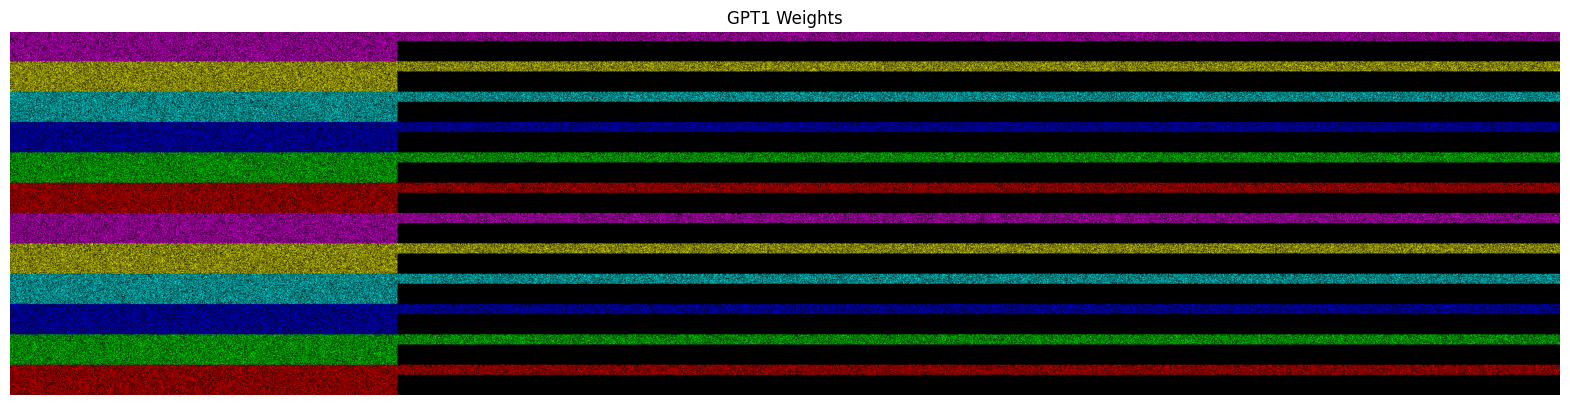

Normalized weights for layer 0 part 0:
(2304, 768)

Normalized weights for layer 0 part 1:
(3072, 768)

Normalized weights for layer 0 part 2:
(768, 3072)

Normalized weights for layer 1 part 0:
(2304, 768)

Normalized weights for layer 1 part 1:
(3072, 768)

Normalized weights for layer 1 part 2:
(768, 3072)

Normalized weights for layer 2 part 0:
(2304, 768)

Normalized weights for layer 2 part 1:
(3072, 768)

Normalized weights for layer 2 part 2:
(768, 3072)

Normalized weights for layer 3 part 0:
(2304, 768)

Normalized weights for layer 3 part 1:
(3072, 768)

Normalized weights for layer 3 part 2:
(768, 3072)

Normalized weights for layer 4 part 0:
(2304, 768)

Normalized weights for layer 4 part 1:
(3072, 768)

Normalized weights for layer 4 part 2:
(768, 3072)

Normalized weights for layer 5 part 0:
(2304, 768)

Normalized weights for layer 5 part 1:
(3072, 768)

Normalized weights for layer 5 part 2:
(768, 3072)

Normalized weights for layer 6 part 0:
(2304, 768)

Normalized w

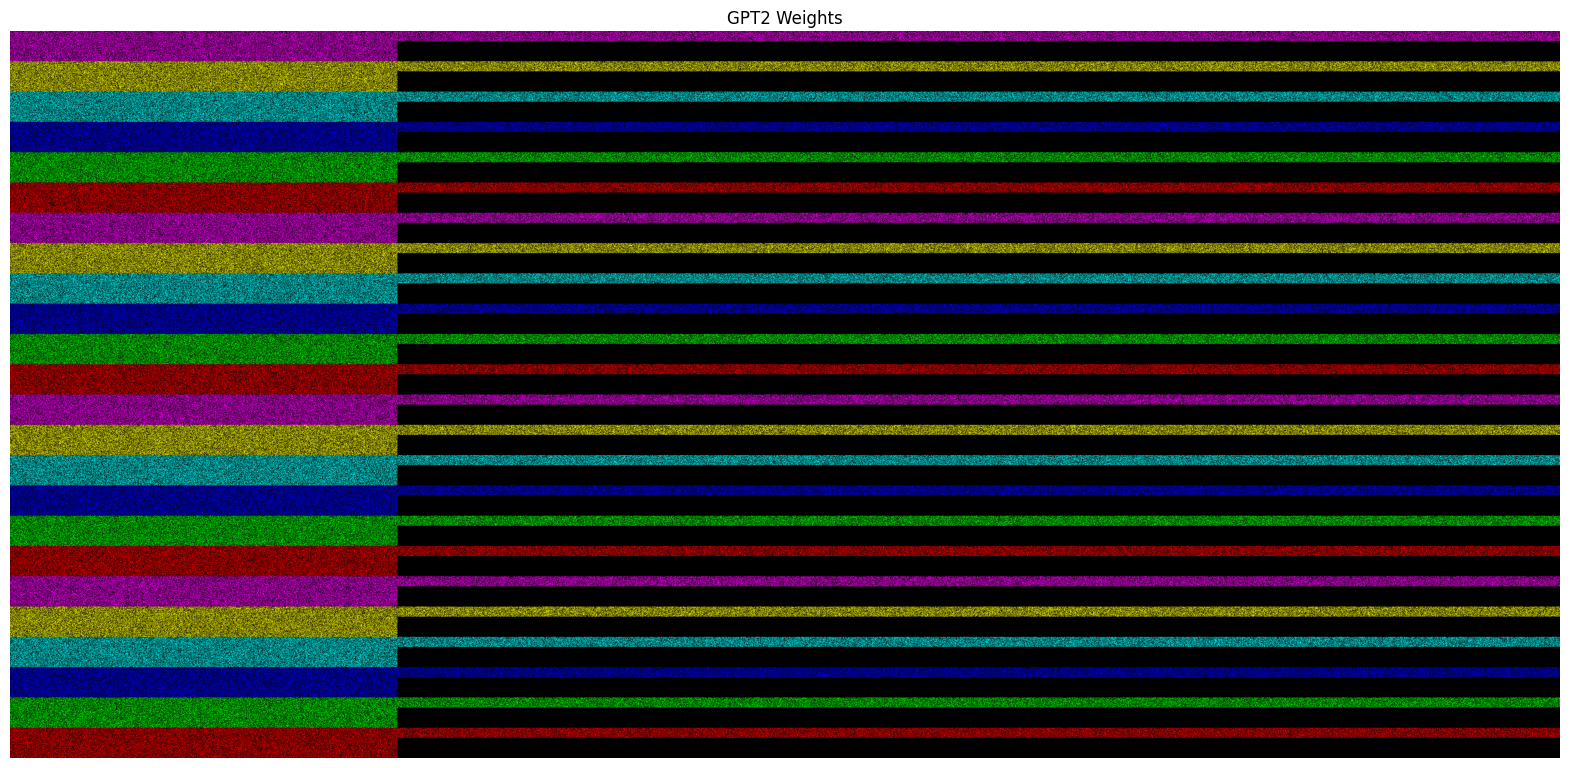

Normalized weights for layer 0 part 0:
(20, 10)

Normalized weights for layer 0 part 1:
(30, 20)

Normalized weights for layer 0 part 2:
(40, 30)

Normalized weights for layer 1 part 0:
(50, 40)



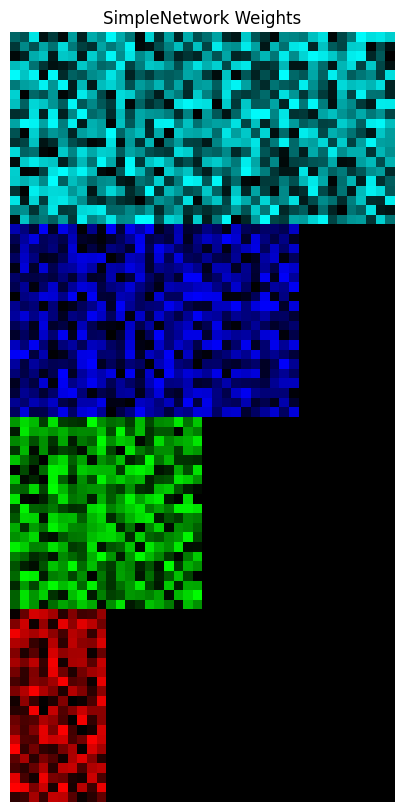

'/mnt/data/SimpleNetwork_weights.png'

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os

# Ensure the directory exists
output_dir = '/mnt/data'
os.makedirs(output_dir, exist_ok=True)

# Define the GPT-1 model
class GPT1(nn.Module):
    def __init__(self, vocab_size, n_embd, n_layer, n_head):
        super(GPT1, self).__init__()
        self.token_embedding = nn.Embedding(vocab_size, n_embd)
        self.positional_embedding = nn.Parameter(torch.zeros(1, 512, n_embd))  # Assuming max context size 512
        self.layers = nn.ModuleList([
            nn.TransformerEncoderLayer(n_embd, n_head, dim_feedforward=4*n_embd)
            for _ in range(n_layer)
        ])
        self.ln_f = nn.LayerNorm(n_embd)
        self.head = nn.Linear(n_embd, vocab_size, bias=False)

    def forward(self, idx):
        b, t = idx.size()
        pos = torch.arange(0, t, dtype=torch.long, device=idx.device).unsqueeze(0)
        tok_emb = self.token_embedding(idx)
        pos_emb = self.positional_embedding[:, :t, :]
        x = tok_emb + pos_emb
        for layer in self.layers:
            x = layer(x)
        x = self.ln_f(x)
        logits = self.head(x)
        return logits

# Define the GPT-2 model
class GPT2(nn.Module):
    def __init__(self, vocab_size, n_embd, n_layer, n_head):
        super(GPT2, self).__init__()
        self.token_embedding = nn.Embedding(vocab_size, n_embd)
        self.positional_embedding = nn.Parameter(torch.zeros(1, 1024, n_embd))  # Assuming max context size 1024
        self.layers = nn.ModuleList([
            nn.TransformerEncoderLayer(n_embd, n_head, dim_feedforward=4*n_embd)
            for _ in range(n_layer)
        ])
        self.ln_f = nn.LayerNorm(n_embd)
        self.head = nn.Linear(n_embd, vocab_size, bias=False)

    def forward(self, idx):
        b, t = idx.size()
        pos = torch.arange(0, t, dtype=torch.long, device=idx.device).unsqueeze(0)
        tok_emb = self.token_embedding(idx)
        pos_emb = self.positional_embedding[:, :t, :]
        x = tok_emb + pos_emb
        for layer in self.layers:
            x = layer(x)
        x = self.ln_f(x)
        logits = self.head(x)
        return logits

# Define a simple feedforward neural network
class SimpleNetwork(nn.Module):
    def __init__(self, layer_sizes):
        super(SimpleNetwork, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i+1]))

    def forward(self, x):
        for layer in self.layers:
            x = torch.relu(layer(x))
        return x

# Function to extract weights from the model layers
def extract_weights(model):
    weight_matrices = []
    for layer in model.modules():
        if isinstance(layer, nn.TransformerEncoderLayer):
            # Extract attention and feedforward weights
            attention_weights = layer.self_attn.in_proj_weight.data.cpu().numpy()
            feedforward_weights1 = layer.linear1.weight.data.cpu().numpy()
            feedforward_weights2 = layer.linear2.weight.data.cpu().numpy()
            weight_matrices.extend([attention_weights, feedforward_weights1, feedforward_weights2])
        elif isinstance(layer, nn.Linear) and not isinstance(model, (GPT1, GPT2)):
            weight_matrices.append(layer.weight.data.cpu().numpy())
    return weight_matrices

# Function to create and visualize the network weights
def create_and_visualize_network(model, network_name):
    # Extract the relevant weights
    all_weights = extract_weights(model)

    # Define RGB values for different layers
    colors = np.array([
        [1, 0, 0],  # red
        [0, 1, 0],  # green
        [0, 0, 1],  # blue
        [0, 1, 1],  # cyan
        [1, 1, 0],  # yellow
        [1, 0, 1]   # magenta
    ])

    # Normalize weights to [0, 1]
    def normalize(weights):
        min_w, max_w = weights.min(), weights.max()
        return (weights - min_w) / (max_w - min_w) if max_w > min_w else np.zeros_like(weights)

    normalized_weights = [normalize(weight) for weight in all_weights]

    # Print out the normalized weights for each layer part
    for idx, norm_weights in enumerate(normalized_weights):
        layer_idx = idx // 3
        part_idx = idx % 3
        print(f"Normalized weights for layer {layer_idx} part {part_idx}:\n{norm_weights.shape}\n")

    # Determine the layout for the visualization
    max_neurons = max(weight.shape[1] for weight in normalized_weights)
    num_layers = len(normalized_weights) // 3 if isinstance(model, (GPT1, GPT2)) else len(normalized_weights)
    layer_height = 20  # Adjust the height for better visualization

    img_height = num_layers * layer_height * (3 if isinstance(model, (GPT1, GPT2)) else 1)
    img_width = max_neurons

    rgb_image = np.zeros((img_height, img_width, 3))

    for idx, norm_weights in enumerate(normalized_weights):
        layer_idx = idx // 3 if isinstance(model, (GPT1, GPT2)) else idx
        layer_color = colors[layer_idx % len(colors)]
        norm_weights_expanded = norm_weights[:, :, np.newaxis] * layer_color

        # Calculate the slice of the image to fill
        slice_height = layer_height if norm_weights_expanded.shape[0] > layer_height else norm_weights_expanded.shape[0]
        slice_width = norm_weights_expanded.shape[1]

        # Fill the corresponding slice in the RGB image
        for h in range(slice_height):
            if idx * layer_height + h < img_height:
                reshaped_width = min(norm_weights_expanded.shape[1], img_width)
                rgb_image[idx * layer_height + h, :reshaped_width, :] = norm_weights_expanded[h, :reshaped_width, :]

    # Flip the image to have the input layer at the bottom
    rgb_image = np.flipud(rgb_image)
    image_path = os.path.join(output_dir, f'{network_name}_weights.png')
    plt.imsave(image_path, rgb_image)
    plt.figure(figsize=(20, 10))
    plt.imshow(rgb_image)
    plt.title(f'{network_name} Weights')
    plt.axis('off')
    plt.show()

    return image_path

# Create and visualize the GPT-1 network
gpt1_model = GPT1(vocab_size=50257, n_embd=768, n_layer=12, n_head=12)
create_and_visualize_network(gpt1_model, "GPT1")

# Create and visualize the GPT-2 network
gpt2_model = GPT2(vocab_size=50257, n_embd=768, n_layer=24, n_head=12)
create_and_visualize_network(gpt2_model, "GPT2")

# Define the network configuration for a simple network
simple_network = SimpleNetwork(layer_sizes=[10, 20, 30, 40, 50])

# Create and visualize the simple network
create_and_visualize_network(simple_network, "SimpleNetwork")
